In [1]:
import json
import numpy as np
import pandas as pd
import warnings 
warnings.filterwarnings('ignore')
import matplotlib.gridspec as gridspec

In [2]:
import matplotlib.pyplot as plt, seaborn as sns

In [3]:
df1 = pd.read_json(r'C:\Users\Aarajula\Downloads\pokedex.json')

In [4]:
df1

,pokemon
0,"{'id': 1, 'num': '001', 'name': 'Bulbasaur', '..."
1,"{'id': 2, 'num': '002', 'name': 'Ivysaur', 'im..."
2,"{'id': 3, 'num': '003', 'name': 'Venusaur', 'i..."
3,"{'id': 4, 'num': '004', 'name': 'Charmander', ..."
4,"{'id': 5, 'num': '005', 'name': 'Charmeleon', ..."
...,...
146,"{'id': 147, 'num': '147', 'name': 'Dratini', '..."
147,"{'id': 148, 'num': '148', 'name': 'Dragonair',..."
148,"{'id': 149, 'num': '149', 'name': 'Dragonite',..."
149,"{'id': 150, 'num': '150', 'name': 'Mewtwo', 'i..."


In [5]:
df2 = pd.read_csv(r'C:\Users\Aarajula\Downloads\pokemon.csv')

In [6]:
df2['id'] = df2.reset_index().index

In [7]:
df2

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary,id
0,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,1,65,65,45,grass,poison,6.9,1,0,0
1,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,2,80,80,60,grass,poison,13.0,1,0,1
2,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,3,122,120,80,grass,poison,100.0,1,0,2
3,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,4,60,50,65,fire,NaN,8.5,1,0,3
4,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,5,80,65,80,fire,NaN,19.0,1,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,['Beast Boost'],0.25,1.0,0.5,2.0,0.5,1.0,2.0,0.5,1.0,...,797,107,101,61,steel,flying,999.9,7,1,796
797,['Beast Boost'],1.00,1.0,0.5,0.5,0.5,2.0,4.0,1.0,1.0,...,798,59,31,109,grass,steel,0.1,7,1,797
798,['Beast Boost'],2.00,0.5,2.0,0.5,4.0,2.0,0.5,1.0,0.5,...,799,97,53,43,dark,dragon,888.0,7,1,798
799,['Prism Armor'],2.00,2.0,1.0,1.0,1.0,0.5,1.0,1.0,2.0,...,800,127,89,79,psychic,NaN,230.0,7,1,799


In [8]:
try:
    pokeDexjsonStr = open(r'C:\Users\Aarajula\Downloads\pokedex.json')
except (FileNotFoundError):
    print('Please check if the file name is correct or if the file exist in first place')
else:
    pokeDexjson = json.load(pokeDexjsonStr)
    print(type(pokeDexjson))
    

<class 'dict'>


In [9]:
import pprint
from pprint import pprint
pprint(pokeDexjson)

{'pokemon': [{'avg_spawns': 69,
              'candy': 'Bulbasaur Candy',
              'candy_count': 25,
              'egg': '2 km',
              'height': '0.71 m',
              'id': 1,
              'img': 'http://www.serebii.net/pokemongo/pokemon/001.png',
              'multipliers': [1.58],
              'name': 'Bulbasaur',
              'next_evolution': [{'name': 'Ivysaur', 'num': '002'},
                                 {'name': 'Venusaur', 'num': '003'}],
              'num': '001',
              'spawn_chance': 0.69,
              'spawn_time': '20:00',
              'type': ['Grass', 'Poison'],
              'weaknesses': ['Fire', 'Ice', 'Flying', 'Psychic'],
              'weight': '6.9 kg'},
             {'avg_spawns': 4.2,
              'candy': 'Bulbasaur Candy',
              'candy_count': 100,
              'egg': 'Not in Eggs',
              'height': '0.99 m',
              'id': 2,
              'img': 'http://www.serebii.net/pokemongo/pokemon/002.png',
    

In [10]:
pokeDex =pd.json_normalize(pokeDexjson, record_path = ['pokemon'])
pokeDex

,id,num,name,img,type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,spawn_time,multipliers,weaknesses,next_evolution,prev_evolution
0,1,001,Bulbasaur,http://www.serebii.net/pokemongo/pokemon/001.png,"[Grass, Poison]",0.71 m,6.9 kg,Bulbasaur Candy,25.0,2 km,0.6900,69.00,20:00,[1.58],"[Fire, Ice, Flying, Psychic]","[{'num': '002', 'name': 'Ivysaur'}, {'num': '0...",NaN
1,2,002,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,"[Grass, Poison]",0.99 m,13.0 kg,Bulbasaur Candy,100.0,Not in Eggs,0.0420,4.20,07:00,"[1.2, 1.6]","[Fire, Ice, Flying, Psychic]","[{'num': '003', 'name': 'Venusaur'}]","[{'num': '001', 'name': 'Bulbasaur'}]"
2,3,003,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,"[Grass, Poison]",2.01 m,100.0 kg,Bulbasaur Candy,NaN,Not in Eggs,0.0170,1.70,11:30,None,"[Fire, Ice, Flying, Psychic]",NaN,"[{'num': '001', 'name': 'Bulbasaur'}, {'num': ..."
3,4,004,Charmander,http://www.serebii.net/pokemongo/pokemon/004.png,[Fire],0.61 m,8.5 kg,Charmander Candy,25.0,2 km,0.2530,25.30,08:45,[1.65],"[Water, Ground, Rock]","[{'num': '005', 'name': 'Charmeleon'}, {'num':...",NaN
4,5,005,Charmeleon,http://www.serebii.net/pokemongo/pokemon/005.png,[Fire],1.09 m,19.0 kg,Charmander Candy,100.0,Not in Eggs,0.0120,1.20,19:00,[1.79],"[Water, Ground, Rock]","[{'num': '006', 'name': 'Charizard'}]","[{'num': '004', 'name': 'Charmander'}]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,147,147,Dratini,http://www.serebii.net/pokemongo/pokemon/147.png,[Dragon],1.80 m,3.3 kg,Dratini Candy,25.0,10 km,0.3000,30.00,06:41,"[1.83, 1.84]","[Ice, Dragon, Fairy]","[{'num': '148', 'name': 'Dragonair'}, {'num': ...",NaN
147,148,148,Dragonair,http://www.serebii.net/pokemongo/pokemon/148.png,[Dragon],3.99 m,16.5 kg,Dratini Candy,100.0,Not in Eggs,0.0200,2.00,11:57,[2.05],"[Ice, Dragon, Fairy]","[{'num': '149', 'name': 'Dragonite'}]","[{'num': '147', 'name': 'Dratini'}]"
148,149,149,Dragonite,http://www.serebii.net/pokemongo/pokemon/149.png,"[Dragon, Flying]",2.21 m,210.0 kg,Dratini Candy,NaN,Not in Eggs,0.0011,0.11,23:38,None,"[Ice, Rock, Dragon, Fairy]",NaN,"[{'num': '147', 'name': 'Dratini'}, {'num': '1..."
149,150,150,Mewtwo,http://www.serebii.net/pokemongo/pokemon/150.png,[Psychic],2.01 m,122.0 kg,None,NaN,Not in Eggs,0.0000,0.00,N/A,None,"[Bug, Ghost, Dark]",NaN,NaN


## Merging:-

In [11]:
Data = pd.merge(pokeDex, df2, on='name', how='right')

In [12]:
Data

,id_x,num,name,img,type,height,weight,candy,candy_count,egg,...,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary,id_y
0,1.0,001,Bulbasaur,http://www.serebii.net/pokemongo/pokemon/001.png,"[Grass, Poison]",0.71 m,6.9 kg,Bulbasaur Candy,25.0,2 km,...,1,65,65,45,grass,poison,6.9,1,0,0
1,2.0,002,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,"[Grass, Poison]",0.99 m,13.0 kg,Bulbasaur Candy,100.0,Not in Eggs,...,2,80,80,60,grass,poison,13.0,1,0,1
2,3.0,003,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,"[Grass, Poison]",2.01 m,100.0 kg,Bulbasaur Candy,NaN,Not in Eggs,...,3,122,120,80,grass,poison,100.0,1,0,2
3,4.0,004,Charmander,http://www.serebii.net/pokemongo/pokemon/004.png,[Fire],0.61 m,8.5 kg,Charmander Candy,25.0,2 km,...,4,60,50,65,fire,NaN,8.5,1,0,3
4,5.0,005,Charmeleon,http://www.serebii.net/pokemongo/pokemon/005.png,[Fire],1.09 m,19.0 kg,Charmander Candy,100.0,Not in Eggs,...,5,80,65,80,fire,NaN,19.0,1,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,NaN,NaN,Celesteela,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,797,107,101,61,steel,flying,999.9,7,1,796
797,NaN,NaN,Kartana,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,798,59,31,109,grass,steel,0.1,7,1,797
798,NaN,NaN,Guzzlord,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,799,97,53,43,dark,dragon,888.0,7,1,798
799,NaN,NaN,Necrozma,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,800,127,89,79,psychic,NaN,230.0,7,1,799


## filtering the data to 151 rows

In [13]:
Data['num'] = pd.to_numeric(Data['num'], errors='coerce')
df = Data[Data['num'] <= 151]

In [14]:
df

,id_x,num,name,img,type,height,weight,candy,candy_count,egg,...,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary,id_y
0,1.0,1.0,Bulbasaur,http://www.serebii.net/pokemongo/pokemon/001.png,"[Grass, Poison]",0.71 m,6.9 kg,Bulbasaur Candy,25.0,2 km,...,1,65,65,45,grass,poison,6.9,1,0,0
1,2.0,2.0,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,"[Grass, Poison]",0.99 m,13.0 kg,Bulbasaur Candy,100.0,Not in Eggs,...,2,80,80,60,grass,poison,13.0,1,0,1
2,3.0,3.0,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,"[Grass, Poison]",2.01 m,100.0 kg,Bulbasaur Candy,NaN,Not in Eggs,...,3,122,120,80,grass,poison,100.0,1,0,2
3,4.0,4.0,Charmander,http://www.serebii.net/pokemongo/pokemon/004.png,[Fire],0.61 m,8.5 kg,Charmander Candy,25.0,2 km,...,4,60,50,65,fire,NaN,8.5,1,0,3
4,5.0,5.0,Charmeleon,http://www.serebii.net/pokemongo/pokemon/005.png,[Fire],1.09 m,19.0 kg,Charmander Candy,100.0,Not in Eggs,...,5,80,65,80,fire,NaN,19.0,1,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,147.0,147.0,Dratini,http://www.serebii.net/pokemongo/pokemon/147.png,[Dragon],1.80 m,3.3 kg,Dratini Candy,25.0,10 km,...,147,50,50,50,dragon,NaN,3.3,1,0,146
147,148.0,148.0,Dragonair,http://www.serebii.net/pokemongo/pokemon/148.png,[Dragon],3.99 m,16.5 kg,Dratini Candy,100.0,Not in Eggs,...,148,70,70,70,dragon,NaN,16.5,1,0,147
148,149.0,149.0,Dragonite,http://www.serebii.net/pokemongo/pokemon/149.png,"[Dragon, Flying]",2.21 m,210.0 kg,Dratini Candy,NaN,Not in Eggs,...,149,100,100,80,dragon,flying,210.0,1,0,148
149,150.0,150.0,Mewtwo,http://www.serebii.net/pokemongo/pokemon/150.png,[Psychic],2.01 m,122.0 kg,None,NaN,Not in Eggs,...,150,194,120,140,psychic,NaN,122.0,1,1,149


In [15]:
data = df.copy()

In [16]:
data

,id_x,num,name,img,type,height,weight,candy,candy_count,egg,...,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary,id_y
0,1.0,1.0,Bulbasaur,http://www.serebii.net/pokemongo/pokemon/001.png,"[Grass, Poison]",0.71 m,6.9 kg,Bulbasaur Candy,25.0,2 km,...,1,65,65,45,grass,poison,6.9,1,0,0
1,2.0,2.0,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,"[Grass, Poison]",0.99 m,13.0 kg,Bulbasaur Candy,100.0,Not in Eggs,...,2,80,80,60,grass,poison,13.0,1,0,1
2,3.0,3.0,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,"[Grass, Poison]",2.01 m,100.0 kg,Bulbasaur Candy,NaN,Not in Eggs,...,3,122,120,80,grass,poison,100.0,1,0,2
3,4.0,4.0,Charmander,http://www.serebii.net/pokemongo/pokemon/004.png,[Fire],0.61 m,8.5 kg,Charmander Candy,25.0,2 km,...,4,60,50,65,fire,NaN,8.5,1,0,3
4,5.0,5.0,Charmeleon,http://www.serebii.net/pokemongo/pokemon/005.png,[Fire],1.09 m,19.0 kg,Charmander Candy,100.0,Not in Eggs,...,5,80,65,80,fire,NaN,19.0,1,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,147.0,147.0,Dratini,http://www.serebii.net/pokemongo/pokemon/147.png,[Dragon],1.80 m,3.3 kg,Dratini Candy,25.0,10 km,...,147,50,50,50,dragon,NaN,3.3,1,0,146
147,148.0,148.0,Dragonair,http://www.serebii.net/pokemongo/pokemon/148.png,[Dragon],3.99 m,16.5 kg,Dratini Candy,100.0,Not in Eggs,...,148,70,70,70,dragon,NaN,16.5,1,0,147
148,149.0,149.0,Dragonite,http://www.serebii.net/pokemongo/pokemon/149.png,"[Dragon, Flying]",2.21 m,210.0 kg,Dratini Candy,NaN,Not in Eggs,...,149,100,100,80,dragon,flying,210.0,1,0,148
149,150.0,150.0,Mewtwo,http://www.serebii.net/pokemongo/pokemon/150.png,[Psychic],2.01 m,122.0 kg,None,NaN,Not in Eggs,...,150,194,120,140,psychic,NaN,122.0,1,1,149


## finding null values

In [17]:
data.isnull().sum()

id_x                  0
num                   0
name                  0
img                   0
type                  0
height                0
weight                0
candy                 0
candy_count          81
egg                   0
spawn_chance          0
avg_spawns            0
spawn_time            0
multipliers          81
weaknesses            0
next_evolution       81
prev_evolution       77
abilities             0
against_bug           0
against_dark          0
against_dragon        0
against_electric      0
against_fairy         0
against_fight         0
against_fire          0
against_flying        0
against_ghost         0
against_grass         0
against_ground        0
against_ice           0
against_normal        0
against_poison        0
against_psychic       0
against_rock          0
against_steel         0
against_water         0
attack                0
base_egg_steps        0
base_happiness        0
base_total            0
capture_rate          0
classfication   

## imputing on next evolution:-
- i filled all the next evolution datat with '0' as the data says that the missing values are present in the final evolution

In [18]:
missing_values_num = data['next_evolution'].isnull().sum()
missing_values_num

81

In [19]:
data[data['next_evolution'].isnull()]

,id_x,num,name,img,type,height,weight,candy,candy_count,egg,...,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary,id_y
2,3.0,3.0,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,"[Grass, Poison]",2.01 m,100.0 kg,Bulbasaur Candy,NaN,Not in Eggs,...,3,122,120,80,grass,poison,100.0,1,0,2
5,6.0,6.0,Charizard,http://www.serebii.net/pokemongo/pokemon/006.png,"[Fire, Flying]",1.70 m,90.5 kg,Charmander Candy,NaN,Not in Eggs,...,6,159,115,100,fire,flying,90.5,1,0,5
8,9.0,9.0,Blastoise,http://www.serebii.net/pokemongo/pokemon/009.png,[Water],1.60 m,85.5 kg,Squirtle Candy,NaN,Not in Eggs,...,9,135,115,78,water,NaN,85.5,1,0,8
11,12.0,12.0,Butterfree,http://www.serebii.net/pokemongo/pokemon/012.png,"[Bug, Flying]",1.09 m,32.0 kg,Caterpie Candy,NaN,Not in Eggs,...,12,90,80,70,bug,flying,32.0,1,0,11
14,15.0,15.0,Beedrill,http://www.serebii.net/pokemongo/pokemon/015.png,"[Bug, Poison]",0.99 m,29.5 kg,Weedle Candy,NaN,Not in Eggs,...,15,15,80,145,bug,poison,29.5,1,0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,145.0,145.0,Zapdos,http://www.serebii.net/pokemongo/pokemon/145.png,"[Electric, Flying]",1.60 m,52.6 kg,None,NaN,Not in Eggs,...,145,125,90,100,electric,flying,52.6,1,1,144
145,146.0,146.0,Moltres,http://www.serebii.net/pokemongo/pokemon/146.png,"[Fire, Flying]",2.01 m,60.0 kg,None,NaN,Not in Eggs,...,146,125,85,90,fire,flying,60.0,1,1,145
148,149.0,149.0,Dragonite,http://www.serebii.net/pokemongo/pokemon/149.png,"[Dragon, Flying]",2.21 m,210.0 kg,Dratini Candy,NaN,Not in Eggs,...,149,100,100,80,dragon,flying,210.0,1,0,148
149,150.0,150.0,Mewtwo,http://www.serebii.net/pokemongo/pokemon/150.png,[Psychic],2.01 m,122.0 kg,None,NaN,Not in Eggs,...,150,194,120,140,psychic,NaN,122.0,1,1,149


In [20]:
data['next_evolution'] = data['next_evolution'].fillna(value='None')


## prev_evolution:-
- on the basis of data i filled every value with '0' as there is no pr evolution for the level1 pokemons

In [21]:
data[data['prev_evolution'].isnull()]

,id_x,num,name,img,type,height,weight,candy,candy_count,egg,...,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary,id_y
0,1.0,1.0,Bulbasaur,http://www.serebii.net/pokemongo/pokemon/001.png,"[Grass, Poison]",0.71 m,6.9 kg,Bulbasaur Candy,25.0,2 km,...,1,65,65,45,grass,poison,6.9,1,0,0
3,4.0,4.0,Charmander,http://www.serebii.net/pokemongo/pokemon/004.png,[Fire],0.61 m,8.5 kg,Charmander Candy,25.0,2 km,...,4,60,50,65,fire,NaN,8.5,1,0,3
6,7.0,7.0,Squirtle,http://www.serebii.net/pokemongo/pokemon/007.png,[Water],0.51 m,9.0 kg,Squirtle Candy,25.0,2 km,...,7,50,64,43,water,NaN,9.0,1,0,6
9,10.0,10.0,Caterpie,http://www.serebii.net/pokemongo/pokemon/010.png,[Bug],0.30 m,2.9 kg,Caterpie Candy,12.0,2 km,...,10,20,20,45,bug,NaN,2.9,1,0,9
12,13.0,13.0,Weedle,http://www.serebii.net/pokemongo/pokemon/013.png,"[Bug, Poison]",0.30 m,3.2 kg,Weedle Candy,12.0,2 km,...,13,20,20,50,bug,poison,3.2,1,0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,145.0,145.0,Zapdos,http://www.serebii.net/pokemongo/pokemon/145.png,"[Electric, Flying]",1.60 m,52.6 kg,None,NaN,Not in Eggs,...,145,125,90,100,electric,flying,52.6,1,1,144
145,146.0,146.0,Moltres,http://www.serebii.net/pokemongo/pokemon/146.png,"[Fire, Flying]",2.01 m,60.0 kg,None,NaN,Not in Eggs,...,146,125,85,90,fire,flying,60.0,1,1,145
146,147.0,147.0,Dratini,http://www.serebii.net/pokemongo/pokemon/147.png,[Dragon],1.80 m,3.3 kg,Dratini Candy,25.0,10 km,...,147,50,50,50,dragon,NaN,3.3,1,0,146
149,150.0,150.0,Mewtwo,http://www.serebii.net/pokemongo/pokemon/150.png,[Psychic],2.01 m,122.0 kg,None,NaN,Not in Eggs,...,150,194,120,140,psychic,NaN,122.0,1,1,149


In [22]:
data['prev_evolution'].fillna(value = 'None')

0                                                   None
1                  [{'num': '001', 'name': 'Bulbasaur'}]
2      [{'num': '001', 'name': 'Bulbasaur'}, {'num': ...
3                                                   None
4                 [{'num': '004', 'name': 'Charmander'}]
                             ...                        
146                                                 None
147                  [{'num': '147', 'name': 'Dratini'}]
148    [{'num': '147', 'name': 'Dratini'}, {'num': '1...
149                                                 None
150                                                 None
Name: prev_evolution, Length: 149, dtype: object

## candy_count:-


In [23]:
data[data['candy_count'].isnull()]

,id_x,num,name,img,type,height,weight,candy,candy_count,egg,...,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary,id_y
2,3.0,3.0,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,"[Grass, Poison]",2.01 m,100.0 kg,Bulbasaur Candy,NaN,Not in Eggs,...,3,122,120,80,grass,poison,100.0,1,0,2
5,6.0,6.0,Charizard,http://www.serebii.net/pokemongo/pokemon/006.png,"[Fire, Flying]",1.70 m,90.5 kg,Charmander Candy,NaN,Not in Eggs,...,6,159,115,100,fire,flying,90.5,1,0,5
8,9.0,9.0,Blastoise,http://www.serebii.net/pokemongo/pokemon/009.png,[Water],1.60 m,85.5 kg,Squirtle Candy,NaN,Not in Eggs,...,9,135,115,78,water,NaN,85.5,1,0,8
11,12.0,12.0,Butterfree,http://www.serebii.net/pokemongo/pokemon/012.png,"[Bug, Flying]",1.09 m,32.0 kg,Caterpie Candy,NaN,Not in Eggs,...,12,90,80,70,bug,flying,32.0,1,0,11
14,15.0,15.0,Beedrill,http://www.serebii.net/pokemongo/pokemon/015.png,"[Bug, Poison]",0.99 m,29.5 kg,Weedle Candy,NaN,Not in Eggs,...,15,15,80,145,bug,poison,29.5,1,0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,145.0,145.0,Zapdos,http://www.serebii.net/pokemongo/pokemon/145.png,"[Electric, Flying]",1.60 m,52.6 kg,None,NaN,Not in Eggs,...,145,125,90,100,electric,flying,52.6,1,1,144
145,146.0,146.0,Moltres,http://www.serebii.net/pokemongo/pokemon/146.png,"[Fire, Flying]",2.01 m,60.0 kg,None,NaN,Not in Eggs,...,146,125,85,90,fire,flying,60.0,1,1,145
148,149.0,149.0,Dragonite,http://www.serebii.net/pokemongo/pokemon/149.png,"[Dragon, Flying]",2.21 m,210.0 kg,Dratini Candy,NaN,Not in Eggs,...,149,100,100,80,dragon,flying,210.0,1,0,148
149,150.0,150.0,Mewtwo,http://www.serebii.net/pokemongo/pokemon/150.png,[Psychic],2.01 m,122.0 kg,None,NaN,Not in Eggs,...,150,194,120,140,psychic,NaN,122.0,1,1,149


In [24]:
data['candy_count'].fillna(0, inplace=True)

##  multipliers:-

In [25]:
data[data['multipliers'].isnull()]

,id_x,num,name,img,type,height,weight,candy,candy_count,egg,...,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary,id_y
2,3.0,3.0,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,"[Grass, Poison]",2.01 m,100.0 kg,Bulbasaur Candy,0.0,Not in Eggs,...,3,122,120,80,grass,poison,100.0,1,0,2
5,6.0,6.0,Charizard,http://www.serebii.net/pokemongo/pokemon/006.png,"[Fire, Flying]",1.70 m,90.5 kg,Charmander Candy,0.0,Not in Eggs,...,6,159,115,100,fire,flying,90.5,1,0,5
8,9.0,9.0,Blastoise,http://www.serebii.net/pokemongo/pokemon/009.png,[Water],1.60 m,85.5 kg,Squirtle Candy,0.0,Not in Eggs,...,9,135,115,78,water,NaN,85.5,1,0,8
11,12.0,12.0,Butterfree,http://www.serebii.net/pokemongo/pokemon/012.png,"[Bug, Flying]",1.09 m,32.0 kg,Caterpie Candy,0.0,Not in Eggs,...,12,90,80,70,bug,flying,32.0,1,0,11
14,15.0,15.0,Beedrill,http://www.serebii.net/pokemongo/pokemon/015.png,"[Bug, Poison]",0.99 m,29.5 kg,Weedle Candy,0.0,Not in Eggs,...,15,15,80,145,bug,poison,29.5,1,0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,145.0,145.0,Zapdos,http://www.serebii.net/pokemongo/pokemon/145.png,"[Electric, Flying]",1.60 m,52.6 kg,None,0.0,Not in Eggs,...,145,125,90,100,electric,flying,52.6,1,1,144
145,146.0,146.0,Moltres,http://www.serebii.net/pokemongo/pokemon/146.png,"[Fire, Flying]",2.01 m,60.0 kg,None,0.0,Not in Eggs,...,146,125,85,90,fire,flying,60.0,1,1,145
148,149.0,149.0,Dragonite,http://www.serebii.net/pokemongo/pokemon/149.png,"[Dragon, Flying]",2.21 m,210.0 kg,Dratini Candy,0.0,Not in Eggs,...,149,100,100,80,dragon,flying,210.0,1,0,148
149,150.0,150.0,Mewtwo,http://www.serebii.net/pokemongo/pokemon/150.png,[Psychic],2.01 m,122.0 kg,None,0.0,Not in Eggs,...,150,194,120,140,psychic,NaN,122.0,1,1,149


In [26]:
data['multipliers'].fillna(value = 'None')

0            [1.58]
1        [1.2, 1.6]
2              None
3            [1.65]
4            [1.79]
           ...     
146    [1.83, 1.84]
147          [2.05]
148            None
149            None
150            None
Name: multipliers, Length: 149, dtype: object

## droping:- type

In [27]:
data.drop('type', axis=1)

,id_x,num,name,img,height,weight,candy,candy_count,egg,spawn_chance,...,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary,id_y
0,1.0,1.0,Bulbasaur,http://www.serebii.net/pokemongo/pokemon/001.png,0.71 m,6.9 kg,Bulbasaur Candy,25.0,2 km,0.6900,...,1,65,65,45,grass,poison,6.9,1,0,0
1,2.0,2.0,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,0.99 m,13.0 kg,Bulbasaur Candy,100.0,Not in Eggs,0.0420,...,2,80,80,60,grass,poison,13.0,1,0,1
2,3.0,3.0,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,2.01 m,100.0 kg,Bulbasaur Candy,0.0,Not in Eggs,0.0170,...,3,122,120,80,grass,poison,100.0,1,0,2
3,4.0,4.0,Charmander,http://www.serebii.net/pokemongo/pokemon/004.png,0.61 m,8.5 kg,Charmander Candy,25.0,2 km,0.2530,...,4,60,50,65,fire,NaN,8.5,1,0,3
4,5.0,5.0,Charmeleon,http://www.serebii.net/pokemongo/pokemon/005.png,1.09 m,19.0 kg,Charmander Candy,100.0,Not in Eggs,0.0120,...,5,80,65,80,fire,NaN,19.0,1,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,147.0,147.0,Dratini,http://www.serebii.net/pokemongo/pokemon/147.png,1.80 m,3.3 kg,Dratini Candy,25.0,10 km,0.3000,...,147,50,50,50,dragon,NaN,3.3,1,0,146
147,148.0,148.0,Dragonair,http://www.serebii.net/pokemongo/pokemon/148.png,3.99 m,16.5 kg,Dratini Candy,100.0,Not in Eggs,0.0200,...,148,70,70,70,dragon,NaN,16.5,1,0,147
148,149.0,149.0,Dragonite,http://www.serebii.net/pokemongo/pokemon/149.png,2.21 m,210.0 kg,Dratini Candy,0.0,Not in Eggs,0.0011,...,149,100,100,80,dragon,flying,210.0,1,0,148
149,150.0,150.0,Mewtwo,http://www.serebii.net/pokemongo/pokemon/150.png,2.01 m,122.0 kg,None,0.0,Not in Eggs,0.0000,...,150,194,120,140,psychic,NaN,122.0,1,1,149


## filling type 2:-
-  based on the data present in type1 we are filling the type2

In [28]:
data[data['type2'].isnull()]

,id_x,num,name,img,type,height,weight,candy,candy_count,egg,...,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary,id_y
3,4.0,4.0,Charmander,http://www.serebii.net/pokemongo/pokemon/004.png,[Fire],0.61 m,8.5 kg,Charmander Candy,25.0,2 km,...,4,60,50,65,fire,NaN,8.5,1,0,3
4,5.0,5.0,Charmeleon,http://www.serebii.net/pokemongo/pokemon/005.png,[Fire],1.09 m,19.0 kg,Charmander Candy,100.0,Not in Eggs,...,5,80,65,80,fire,NaN,19.0,1,0,4
6,7.0,7.0,Squirtle,http://www.serebii.net/pokemongo/pokemon/007.png,[Water],0.51 m,9.0 kg,Squirtle Candy,25.0,2 km,...,7,50,64,43,water,NaN,9.0,1,0,6
7,8.0,8.0,Wartortle,http://www.serebii.net/pokemongo/pokemon/008.png,[Water],0.99 m,22.5 kg,Squirtle Candy,100.0,Not in Eggs,...,8,65,80,58,water,NaN,22.5,1,0,7
8,9.0,9.0,Blastoise,http://www.serebii.net/pokemongo/pokemon/009.png,[Water],1.60 m,85.5 kg,Squirtle Candy,0.0,Not in Eggs,...,9,135,115,78,water,NaN,85.5,1,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,143.0,143.0,Snorlax,http://www.serebii.net/pokemongo/pokemon/143.png,[Normal],2.11 m,460.0 kg,None,0.0,10 km,...,143,65,110,30,normal,NaN,460.0,1,0,142
146,147.0,147.0,Dratini,http://www.serebii.net/pokemongo/pokemon/147.png,[Dragon],1.80 m,3.3 kg,Dratini Candy,25.0,10 km,...,147,50,50,50,dragon,NaN,3.3,1,0,146
147,148.0,148.0,Dragonair,http://www.serebii.net/pokemongo/pokemon/148.png,[Dragon],3.99 m,16.5 kg,Dratini Candy,100.0,Not in Eggs,...,148,70,70,70,dragon,NaN,16.5,1,0,147
149,150.0,150.0,Mewtwo,http://www.serebii.net/pokemongo/pokemon/150.png,[Psychic],2.01 m,122.0 kg,None,0.0,Not in Eggs,...,150,194,120,140,psychic,NaN,122.0,1,1,149


In [29]:
data['type2'].fillna(data['type1'], inplace=True)

In [30]:
data['percentage_male'].isnull().sum()

13

## droping weight_kg, height_m:-

In [31]:
data[data['weight_kg'].isnull()]

,id_x,num,name,img,type,height,weight,candy,candy_count,egg,...,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary,id_y
18,19.0,19.0,Rattata,http://www.serebii.net/pokemongo/pokemon/019.png,[Normal],0.30 m,3.5 kg,Rattata Candy,25.0,2 km,...,19,25,35,72,normal,dark,NaN,1,0,18
19,20.0,20.0,Raticate,http://www.serebii.net/pokemongo/pokemon/020.png,[Normal],0.71 m,18.5 kg,Rattata Candy,0.0,Not in Eggs,...,20,40,80,77,normal,dark,NaN,1,0,19
25,26.0,26.0,Raichu,http://www.serebii.net/pokemongo/pokemon/026.png,[Electric],0.79 m,30.0 kg,Pikachu Candy,0.0,Not in Eggs,...,26,95,85,110,electric,electric,NaN,1,0,25
26,27.0,27.0,Sandshrew,http://www.serebii.net/pokemongo/pokemon/027.png,[Ground],0.61 m,12.0 kg,Sandshrew Candy,50.0,5 km,...,27,10,35,40,ground,ice,NaN,1,0,26
27,28.0,28.0,Sandslash,http://www.serebii.net/pokemongo/pokemon/028.png,[Ground],0.99 m,29.5 kg,Sandshrew Candy,0.0,Not in Eggs,...,28,25,65,65,ground,ice,NaN,1,0,27
36,37.0,37.0,Vulpix,http://www.serebii.net/pokemongo/pokemon/037.png,[Fire],0.61 m,9.9 kg,Vulpix Candy,50.0,5 km,...,37,50,65,65,fire,ice,NaN,1,0,36
37,38.0,38.0,Ninetales,http://www.serebii.net/pokemongo/pokemon/038.png,[Fire],1.09 m,19.9 kg,Vulpix Candy,0.0,Not in Eggs,...,38,81,100,109,fire,ice,NaN,1,0,37
49,50.0,50.0,Diglett,http://www.serebii.net/pokemongo/pokemon/050.png,[Ground],0.20 m,0.8 kg,Diglett Candy,50.0,5 km,...,50,35,45,90,ground,ground,NaN,1,0,49
50,51.0,51.0,Dugtrio,http://www.serebii.net/pokemongo/pokemon/051.png,[Ground],0.71 m,33.3 kg,Dugtrio,0.0,Not in Eggs,...,51,50,70,110,ground,ground,NaN,1,0,50
51,52.0,52.0,Meowth,http://www.serebii.net/pokemongo/pokemon/052.png,[Normal],0.41 m,4.2 kg,Meowth Candy,50.0,5 km,...,52,50,40,90,normal,dark,NaN,1,0,51


In [32]:
data[['weight','weight_kg']]

,weight,weight_kg
0,6.9 kg,6.9
1,13.0 kg,13.0
2,100.0 kg,100.0
3,8.5 kg,8.5
4,19.0 kg,19.0
...,...,...
146,3.3 kg,3.3
147,16.5 kg,16.5
148,210.0 kg,210.0
149,122.0 kg,122.0


In [33]:
data[['height','height_m']]

,height,height_m
0,0.71 m,0.7
1,0.99 m,1.0
2,2.01 m,2.0
3,0.61 m,0.6
4,1.09 m,1.1
...,...,...
146,1.80 m,1.8
147,3.99 m,4.0
148,2.21 m,2.2
149,2.01 m,2.0


In [34]:
data.drop('height_m', axis=1, inplace=True)

In [35]:
data.drop('weight_kg', axis=1, inplace=True)

##  percentage_male:-

In [36]:
missing_percentage_male_rows = data[data["percentage_male"].isna()]
unique_types = missing_percentage_male_rows["type1"].unique()
print("Unique Types with Missing 'percentage_male':", unique_types)


Unique Types with Missing 'percentage_male': ['electric' 'water' 'normal' 'ice' 'fire' 'psychic']


In [37]:
data[data["percentage_male"].isna()]

,id_x,num,name,img,type,height,weight,candy,candy_count,egg,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,generation,is_legendary,id_y
80,81.0,81.0,Magnemite,http://www.serebii.net/pokemongo/pokemon/081.png,[Electric],0.30 m,6.0 kg,Magnemite Candy,50.0,5 km,...,NaN,81,95,55,45,electric,steel,1,0,80
81,82.0,82.0,Magneton,http://www.serebii.net/pokemongo/pokemon/082.png,[Electric],0.99 m,60.0 kg,Magnemite Candy,0.0,Not in Eggs,...,NaN,82,120,70,70,electric,steel,1,0,81
99,100.0,100.0,Voltorb,http://www.serebii.net/pokemongo/pokemon/100.png,[Electric],0.51 m,10.4 kg,Voltorb Candy,50.0,5 km,...,NaN,100,55,55,100,electric,electric,1,0,99
100,101.0,101.0,Electrode,http://www.serebii.net/pokemongo/pokemon/101.png,[Electric],1.19 m,66.6 kg,Voltorb Candy,0.0,Not in Eggs,...,NaN,101,80,80,150,electric,electric,1,0,100
119,120.0,120.0,Staryu,http://www.serebii.net/pokemongo/pokemon/120.png,[Water],0.79 m,34.5 kg,Staryu Candy,50.0,5 km,...,NaN,120,70,55,85,water,water,1,0,119
120,121.0,121.0,Starmie,http://www.serebii.net/pokemongo/pokemon/121.png,"[Water, Psychic]",1.09 m,80.0 kg,Staryu Candy,0.0,Not in Eggs,...,NaN,121,100,85,115,water,psychic,1,0,120
131,132.0,132.0,Ditto,http://www.serebii.net/pokemongo/pokemon/132.png,[Normal],0.30 m,4.0 kg,None,0.0,Not in Eggs,...,NaN,132,48,48,48,normal,normal,1,0,131
136,137.0,137.0,Porygon,http://www.serebii.net/pokemongo/pokemon/137.png,[Normal],0.79 m,36.5 kg,None,0.0,5 km,...,NaN,137,85,75,40,normal,normal,1,0,136
143,144.0,144.0,Articuno,http://www.serebii.net/pokemongo/pokemon/144.png,"[Ice, Flying]",1.70 m,55.4 kg,None,0.0,Not in Eggs,...,NaN,144,95,125,85,ice,flying,1,1,143
144,145.0,145.0,Zapdos,http://www.serebii.net/pokemongo/pokemon/145.png,"[Electric, Flying]",1.60 m,52.6 kg,None,0.0,Not in Eggs,...,NaN,145,125,90,100,electric,flying,1,1,144


In [38]:
data.loc[data["type1"] == "electric", "percentage_male"] = data.loc[data["type1"] == "electric", "percentage_male"].fillna(data.loc[data["type1"] == "electric", "percentage_male"].mode()[0])


In [39]:
data[data["type1"]=="electric"]["percentage_male"].isnull().sum()

0

In [40]:
data['percentage_male'].isnull().sum()

8

In [41]:
data.loc[data["type1"] == "water", "percentage_male"] = data.loc[data["type1"] == "water", "percentage_male"].fillna(data.loc[data["type1"] == "water", "percentage_male"].mode()[0])


In [42]:
data[data["type1"]=="water"]["percentage_male"].isnull().sum()

0

In [43]:
data['percentage_male'].isnull().sum()

6

In [44]:
data.loc[data["type1"] == "normal", "percentage_male"] = data.loc[data["type1"] == "normal", "percentage_male"].fillna(data.loc[data["type1"] == "normal", "percentage_male"].mode()[0])


In [45]:
data[data["type1"]=="normal"]["percentage_male"].isnull().sum()

0

In [46]:
data.loc[data["type1"] == "ice", "percentage_male"] = data.loc[data["type1"] == "ice", "percentage_male"].fillna(data.loc[data["type1"] == "ice", "percentage_male"].mode()[0])


In [47]:
data[data["type1"]=="ice"]["percentage_male"].isnull().sum()

0

In [48]:
data.loc[data["type1"] == "fire", "percentage_male"] = data.loc[data["type1"] == "fire", "percentage_male"].fillna(data.loc[data["type1"] == "fire", "percentage_male"].mode()[0])


In [49]:
data[data["type1"]=="fire"]["percentage_male"].isnull().sum()

0

In [50]:
data.loc[data["type1"] == "psychic", "percentage_male"] = data.loc[data["type1"] == "psychic", "percentage_male"].fillna(data.loc[data["type1"] == "psychic", "percentage_male"].mode()[0])


In [51]:
data[data["type1"]=="psychic"]["percentage_male"].isnull().sum()

0

# Data Visulaization with respect to univarien and bie varient and mutlivarient

In [52]:
pokemon = data.copy()

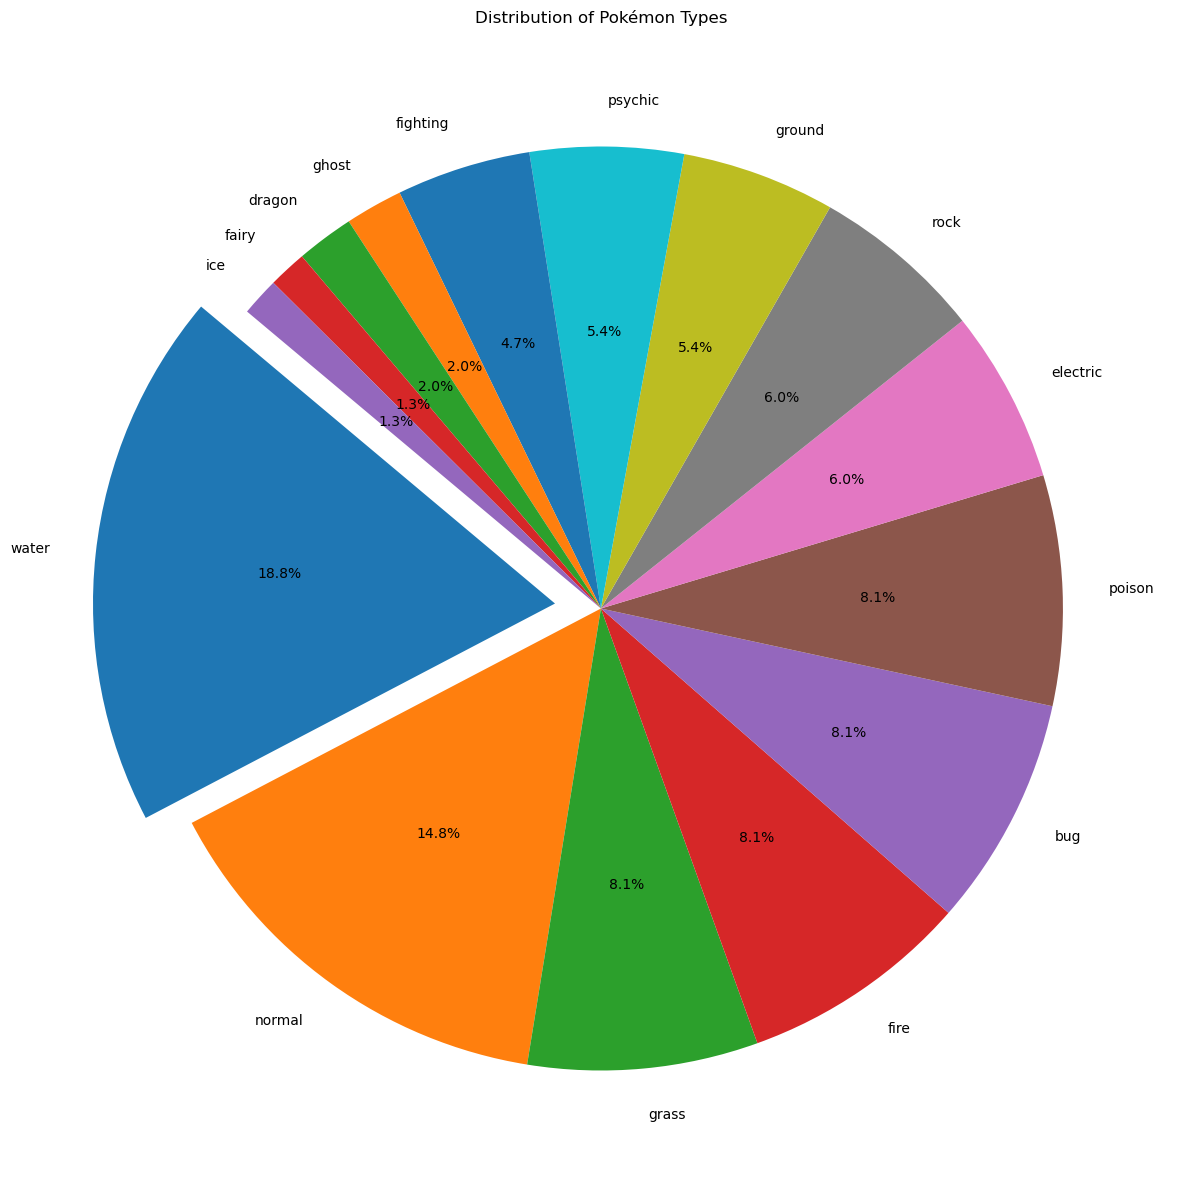

In [53]:

types_count = pokemon['type1'].value_counts()

explode = (0.1,) + (0,) * (len(types_count) - 1)

plt.figure(figsize=(15, 15))
plt.pie(types_count, labels=types_count.index, autopct='%1.1f%%', startangle=140, explode=explode)
plt.title('Distribution of Pokémon Types')
plt.show()



### The pie chart created shows the distribution of Pokémon types as a percentage of the whole. Here are some insights you can draw from the plot:

- Dominant Types: Larger slices of the pie chart represent more dominant Pokémon types in the dataset. For example, if 'Water' and 'Normal' have larger slices, it indicates that these types are more prevalent.

- Rare Types: Smaller slices suggest less common Pokémon types. If certain types have very small slices, they are less represented in the dataset.For example, 'Fairy and 'Ice are the least prelavent

- Type Proportions: The percentage labels on each slice give you a quick overview of the proportion of each type in the dataset. For instance, if 'Fire' types make up 10% of the dataset, it indicates the relative abundance of that type.

- Diversity: If the pie chart has many different colors (slices), it suggests a diverse mix of Pokémon types in the dataset.

- Emphasizing a Type: The use of the explode parameter emphasizes a specific type (in this case, the first type) by slightly pulling it out from the center. This can draw attention to a particular type if needed.

- Type Rarity: You can quickly identify the rarest types by looking at the smallest slices. If certain types have very low percentages, they are less common.

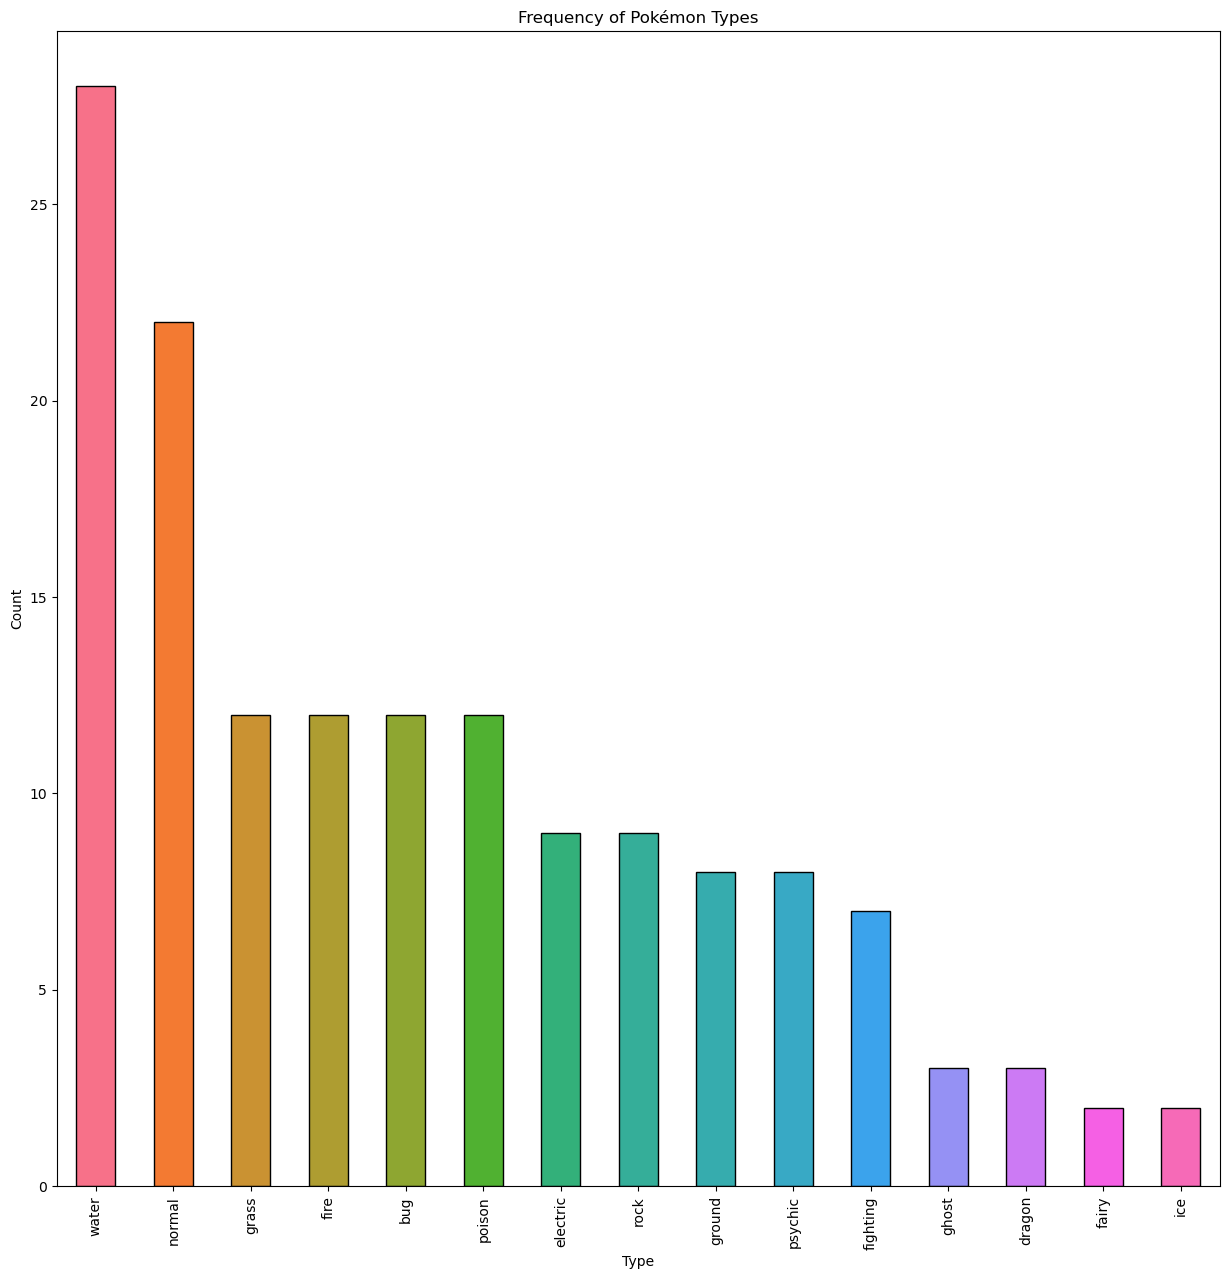

In [54]:

species_counts = pokemon['type1'].value_counts()
num_colors = len(species_counts)
random_colors = sns.color_palette("husl", n_colors=num_colors)
plt.figure(figsize=(15, 15))
species_counts.plot(kind='bar', color=random_colors, edgecolor='black')

plt.title('Frequency of Pokémon Types')
plt.xlabel('Type')
plt.ylabel('Count')

plt.show()


### The bar plot you've created visualizes the frequency of Pokémon types using a color palette. Here are some insights you can draw from the plot:

- Type Distribution: Each bar represents a Pokémon type, and the height of the bar indicates the count or frequency of that type in the dataset. For example, if 'Water' has the tallest bar, it suggests that Water-type Pokémon are the most numerous.

- Color Palette: The use of a color palette enhances the visual appeal of the plot. Each type is represented by a distinct color, making it easier to differentiate between them.

- Visualizing Diversity: The variety of colors in the plot reflects the diversity of Pokémon types in the dataset. If there are many different colors, it suggests a diverse mix of Pokémon types.

- Type Dominance: Taller bars represent more dominant Pokémon types, while shorter bars represent less common types. If certain types have very short bars, they are less prevalent in the dataset.

- Contrast and Readability: The black edgecolor around the bars enhances the contrast, making it easier to distinguish between adjacent bars. This improves the overall readability of the plot.

- Insights into Imbalances: If there are significant differences in the heights of bars, it may indicate imbalances in the dataset. For instance, if one type is much more common than others, it could impact analyses based on type.

# Heatmap

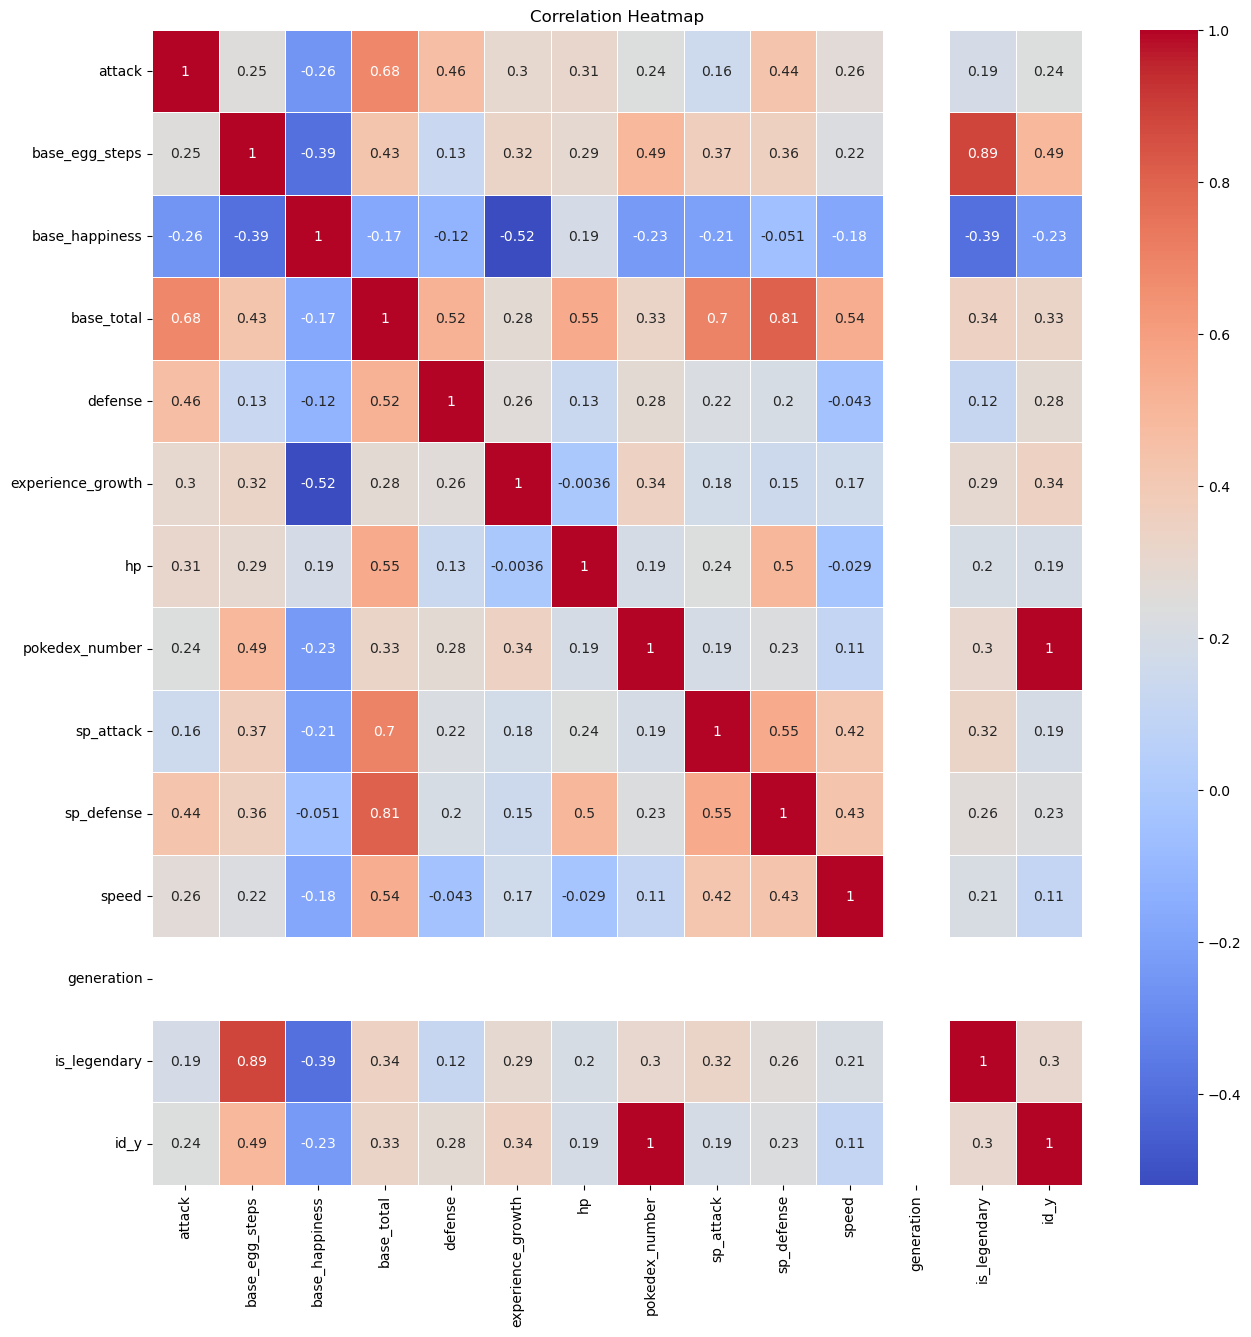

In [55]:

plt.figure(figsize=(15, 15))
numeric_columns = data.select_dtypes(include= 'int64').columns
numeric_data = pokemon[numeric_columns]

correlation_matrix = pokemon[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

### Insights:-

- Colorful Map: Imagine the heatmap as a colorful treasure map. Each box (or "cell") on the map represents a pair of treasures (or variables) from our Pokémon data.

- Treasure Strength: The colors in the boxes show how much two treasures are friends or enemies. The warmer colors like red and orange mean they are good friends, and the colder colors like blue and purple mean they are not so close.

- Number Guide: Inside each box, there's a number. This number tells us how strong the friendship is between the treasures. The higher the number, the stronger the friendship, and the more the colors will lean towards warm colors.

- Example: Attack and Defense: Look at the boxes where "Attack" and "Defense" meet. The color is warm, and the number is high. It's like saying, "When a Pokémon has a strong Attack, it usually also has a strong Defense."

- Opposite Friends: Sometimes, you'll see a box with a warm color on one side and a cold color on the other. It's like saying, "These two treasures are not really similar. When one goes up, the other goes down."

- No Color, No Friendship: If a box is white, it means there's not much friendship between those two treasures. They don't really affect each other.

- Finding Patterns: By looking at the map, we can find patterns and understand which treasures like to be together, which ones don't, and which ones don't really care about each other.

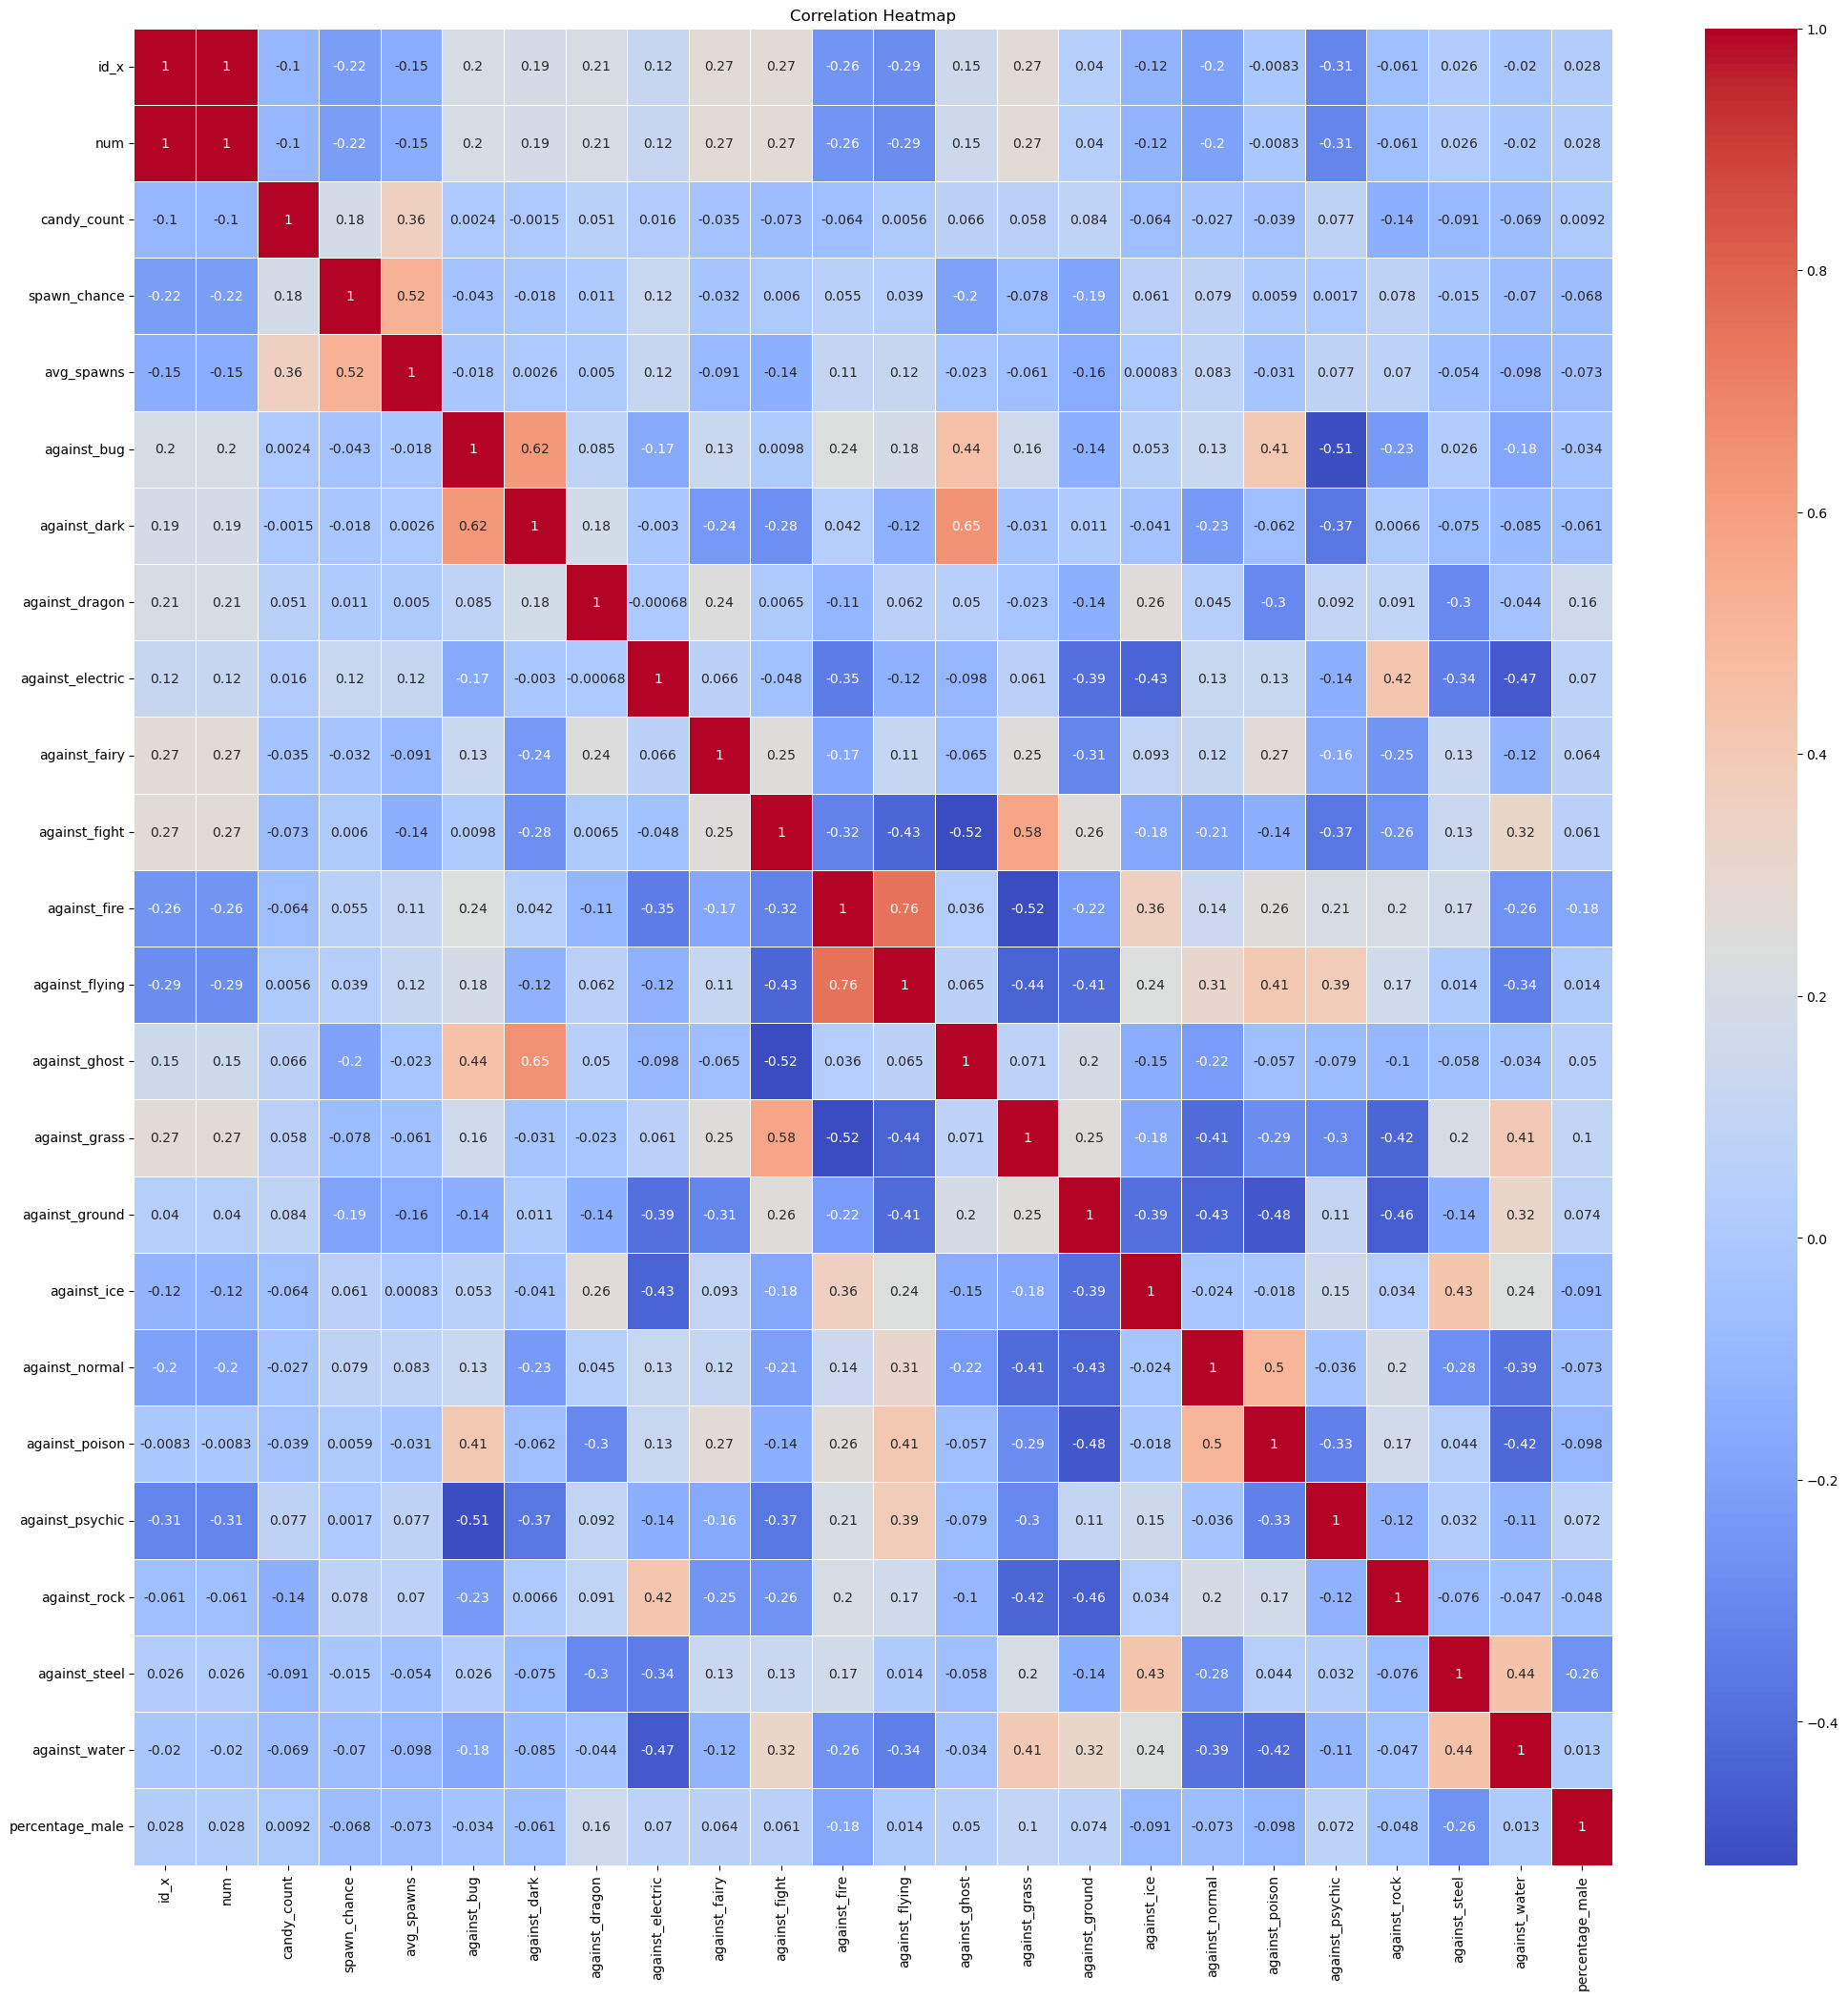

In [56]:
plt.figure(figsize=(25, 25))
numeric_columns = data.select_dtypes(include= 'float64').columns
numeric_data = pokemon[numeric_columns]
correlation_matrix = pokemon[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

### Insights:-
- Colorful Map: Imagine this heatmap as a magical garden where each flower bed represents a pair of features (or qualities) of our Pokémon. The flowers in each bed show how well these features get along.

- Flower Strength: The colors in the beds represent the strength of the friendship between features. Warm colors like red and orange mean the features are good friends, while cool colors like blue and purple mean they are not very close.

- Number Guide: Each flower has a number on it. This number tells us how strong the friendship is between the features. A higher number means a stronger friendship, and the warmer the colors.

- Example: Height and Weight: Look at the flower bed where "Height" and "Weight" meet. The color is warm, and the number is high. It's like saying, "When a Pokémon is tall, it usually weighs more, and when it's short, it usually weighs less."

- Opposite Friends: If you see a bed with a warm color on one side and a cool color on the other, it's like saying, "These features are not really similar. When one goes up, the other goes down."

- No Color, No Friendship: If a flower bed is white, it means there's not much friendship between those features. They don't really affect each other.

- Finding Patterns: By wandering through this magical garden, we can discover patterns and understand which features like to be together, which ones don't, and which ones don't really care about each other.

In [57]:
type1_grouped_unique = pokemon.groupby('type1')

In [58]:
grass = type1_grouped_unique.get_group('grass')
grass

,id_x,num,name,img,type,height,weight,candy,candy_count,egg,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,generation,is_legendary,id_y
0,1.0,1.0,Bulbasaur,http://www.serebii.net/pokemongo/pokemon/001.png,"[Grass, Poison]",0.71 m,6.9 kg,Bulbasaur Candy,25.0,2 km,...,88.1,1,65,65,45,grass,poison,1,0,0
1,2.0,2.0,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,"[Grass, Poison]",0.99 m,13.0 kg,Bulbasaur Candy,100.0,Not in Eggs,...,88.1,2,80,80,60,grass,poison,1,0,1
2,3.0,3.0,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,"[Grass, Poison]",2.01 m,100.0 kg,Bulbasaur Candy,0.0,Not in Eggs,...,88.1,3,122,120,80,grass,poison,1,0,2
42,43.0,43.0,Oddish,http://www.serebii.net/pokemongo/pokemon/043.png,"[Grass, Poison]",0.51 m,5.4 kg,Oddish Candy,25.0,5 km,...,50.0,43,75,65,30,grass,poison,1,0,42
43,44.0,44.0,Gloom,http://www.serebii.net/pokemongo/pokemon/044.png,"[Grass, Poison]",0.79 m,8.6 kg,Oddish Candy,100.0,Not in Eggs,...,50.0,44,85,75,40,grass,poison,1,0,43
44,45.0,45.0,Vileplume,http://www.serebii.net/pokemongo/pokemon/045.png,"[Grass, Poison]",1.19 m,18.6 kg,Oddish Candy,0.0,Not in Eggs,...,50.0,45,110,90,50,grass,poison,1,0,44
68,69.0,69.0,Bellsprout,http://www.serebii.net/pokemongo/pokemon/069.png,"[Grass, Poison]",0.71 m,4.0 kg,Bellsprout Candy,25.0,5 km,...,50.0,69,70,30,40,grass,poison,1,0,68
69,70.0,70.0,Weepinbell,http://www.serebii.net/pokemongo/pokemon/070.png,"[Grass, Poison]",0.99 m,6.4 kg,Bellsprout Candy,100.0,Not in Eggs,...,50.0,70,85,45,55,grass,poison,1,0,69
70,71.0,71.0,Victreebel,http://www.serebii.net/pokemongo/pokemon/071.png,"[Grass, Poison]",1.70 m,15.5 kg,Bellsprout Candy,0.0,Not in Eggs,...,50.0,71,100,70,70,grass,poison,1,0,70
101,102.0,102.0,Exeggcute,http://www.serebii.net/pokemongo/pokemon/102.png,"[Grass, Psychic]",0.41 m,2.5 kg,Exeggcute Candy,50.0,5 km,...,50.0,102,60,45,40,grass,psychic,1,0,101


In [59]:
pokemon['type1'].unique()

array(['grass', 'fire', 'water', 'bug', 'normal', 'poison', 'electric',
       'ground', 'fairy', 'fighting', 'psychic', 'rock', 'ghost', 'ice',
       'dragon'], dtype=object)

In [60]:
fire = type1_grouped_unique.get_group('fire')


In [61]:
water = type1_grouped_unique.get_group('water')

In [62]:
bug = type1_grouped_unique.get_group('bug')

In [63]:
normal = type1_grouped_unique.get_group('normal')

In [64]:
poison = type1_grouped_unique.get_group('poison')

In [65]:
electric = type1_grouped_unique.get_group('electric')

In [66]:
ground = type1_grouped_unique.get_group('ground')

In [67]:
fairy = type1_grouped_unique.get_group('fairy')

In [68]:
fighting = type1_grouped_unique.get_group('fighting')

In [69]:
psychic = type1_grouped_unique.get_group('psychic')

In [70]:
rock = type1_grouped_unique.get_group('rock')

In [71]:
ghost = type1_grouped_unique.get_group('ghost')

In [72]:
ice = type1_grouped_unique.get_group('ice')

In [73]:
dragon = type1_grouped_unique.get_group('dragon')

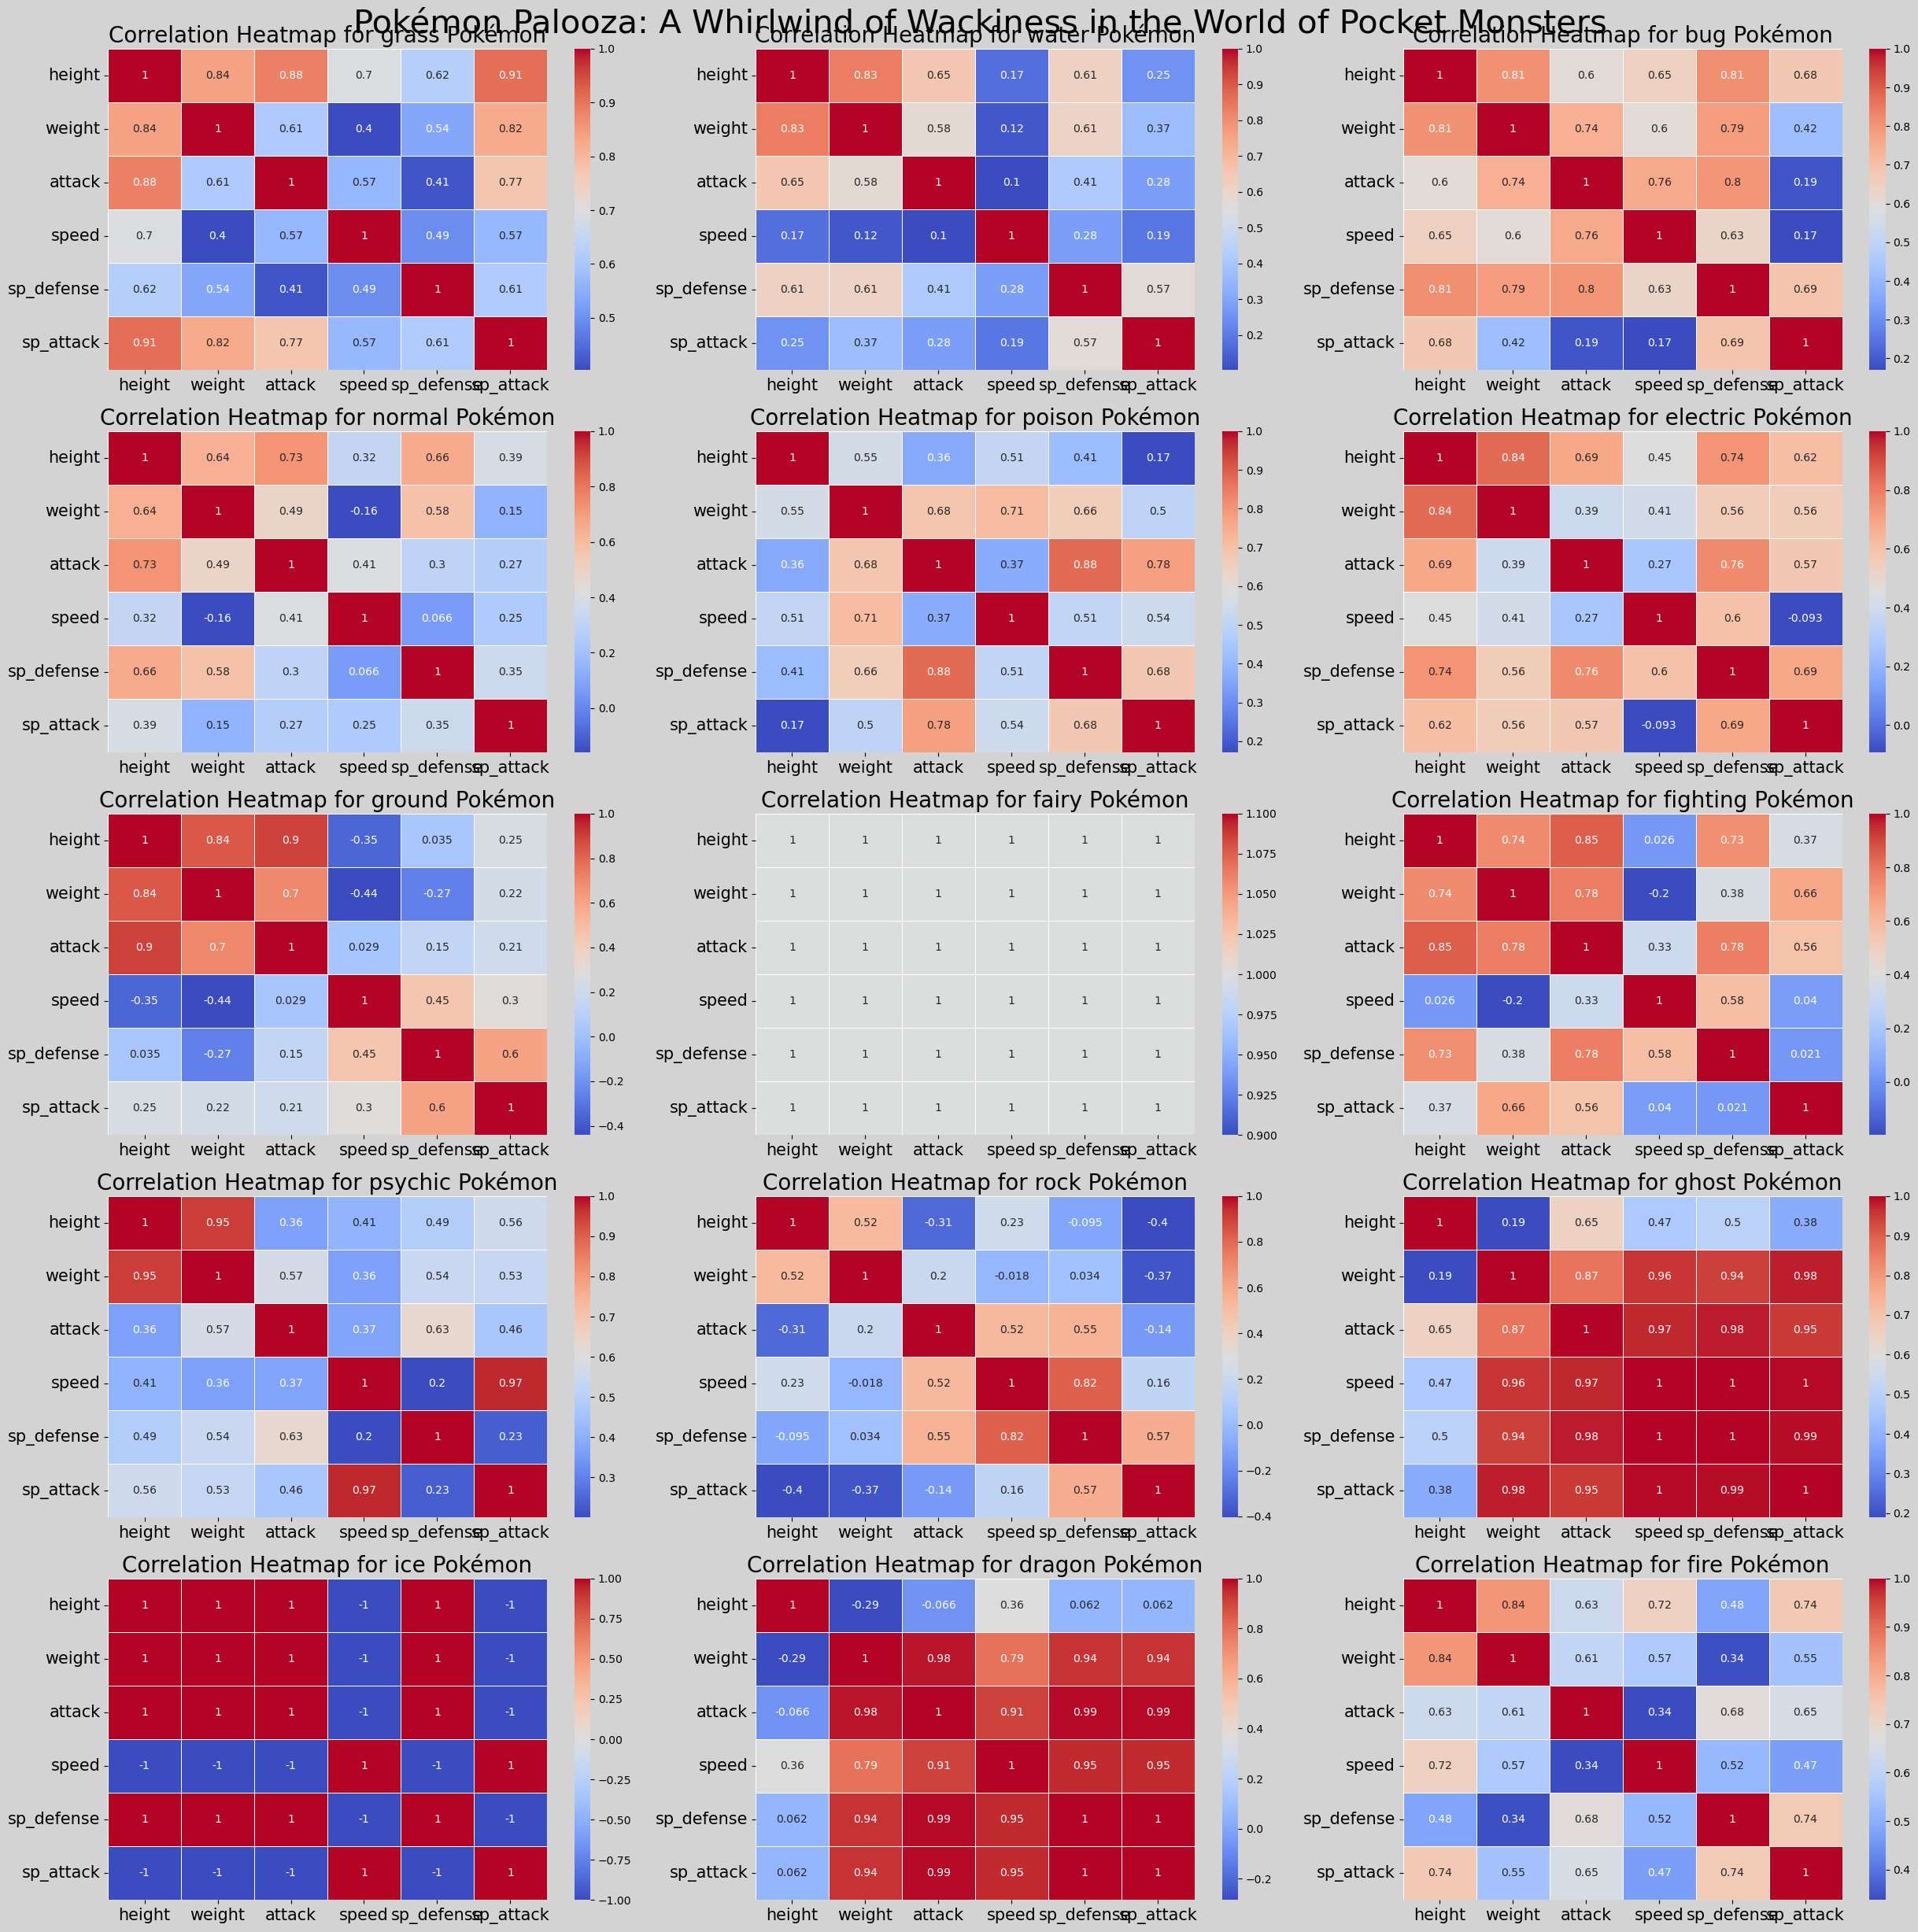

In [74]:
pokemon_types = [grass, water, bug, normal, poison, electric, ground, fairy, fighting, psychic, rock, ghost, ice, dragon, fire]
n_rows = len(pokemon_types) // 3 + (len(pokemon_types) % 3 > 0)
n_cols = min(3, len(pokemon_types))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(25, 25), facecolor='lightgrey')
G = gridspec.GridSpec(n_rows, n_cols)

for idx, pokemon_type in enumerate(pokemon_types):
    ax = plt.subplot(G[idx // n_cols, idx % n_cols])
    numeric_columns = ['height', 'weight', 'attack', 'speed', 'sp_defense', 'sp_attack']
    
    pokemon_type['height'] = pokemon_type['height'].str.extract('(\d+\.\d+)').astype(float)
    pokemon_type['weight'] = pokemon_type['weight'].str.extract('(\d+\.\d+)').astype(float)
    
    correlation_matrix = pokemon_type[numeric_columns].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5, ax=ax)
    ax.set_title(f'Correlation Heatmap for {pokemon_type.iloc[0]["type1"]} Pokémon', fontsize=20)
    
    # Increase the font size for x-axis and y-axis tick labels
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=15)
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=15)
    

fig.suptitle("Pokémon Palooza: A Whirlwind of Wackiness in the World of Pocket Monsters", fontsize=30)

plt.tight_layout()
plt.show()


### Insights:-
- Type-Specific Analysis: Each heatmap is specific to a Pokémon type, like Grass, Water, Bug, etc. This allows us to dive into the relationships between various attributes (height, weight, attack, speed, sp_defense, sp_attack) for each type separately.

- Colorful Relationships: The colors in each heatmap indicate the strength and direction of relationships between attributes. Warmer colors (reds and oranges) suggest positive relationships, while cooler colors (blues) suggest negative relationships.

- Height and Weight Correlation: For example, in the heatmap for a particular type, if the box where 'height' and 'weight' meet is warm and has a high number, it means that Pokémon of that type tend to have a positive correlation between height and weight.

- Attribute Relationships: Similarly, you can explore how other attributes correlate within each Pokémon type. For instance, if 'attack' and 'defense' have a warm-colored box, it means that Pokémon of that type often have a positive correlation between attack and defense.

- Type-Specific Patterns: By examining multiple heatmaps, you can identify patterns that are specific to each Pokémon type. Some types may have strong positive correlations between certain attributes, while others may show different patterns.

- Font Size Enhancements: The increased font size for tick labels enhances readability, making it easier to interpret the values in each box.

- Overall Pokémon Palooza Theme: The title "Pokémon Palooza: A Whirlwind of Wackiness in the World of Pocket Monsters" adds a playful and whimsical theme to the visual exploration, creating a fun and engaging experience.

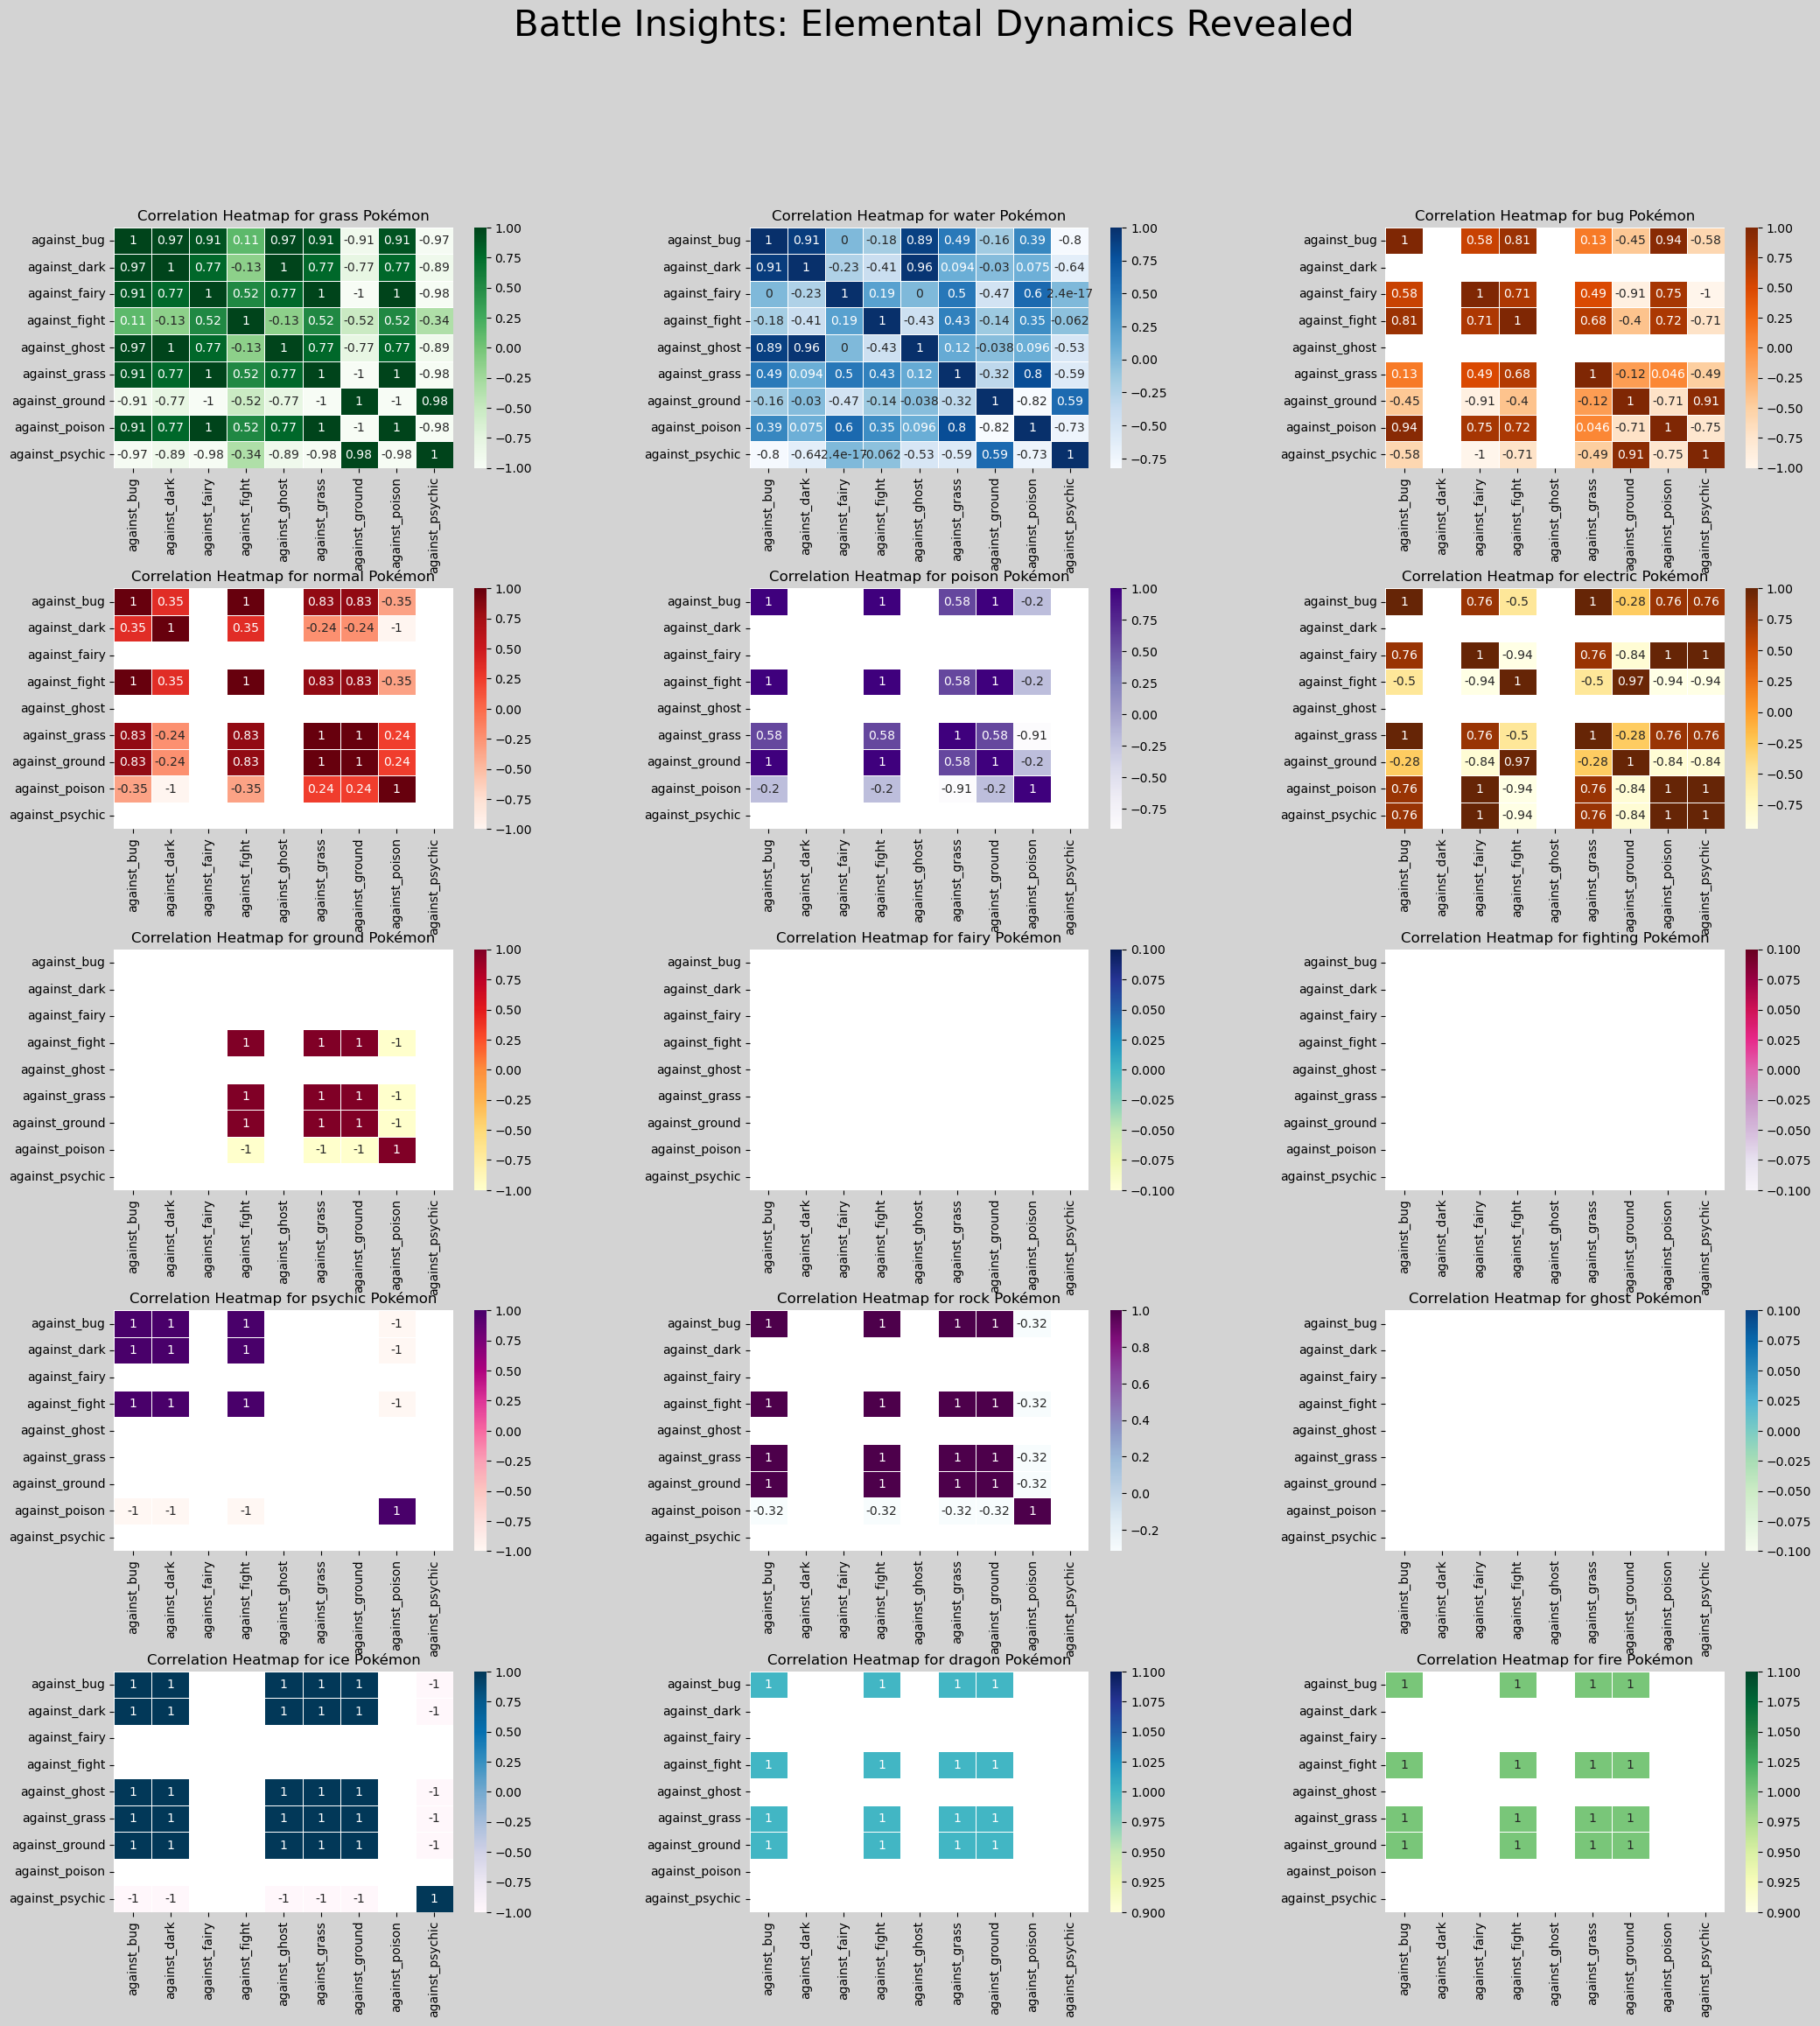

In [75]:

pokemon_types = [grass, water, bug, normal, poison, electric, ground, fairy, fighting, psychic, rock, ghost, ice, dragon, fire]

n_rows = len(pokemon_types) // 3 + (len(pokemon_types) % 3 > 0)
n_cols = min(3, len(pokemon_types))

fig = plt.figure(figsize=(25, 25), facecolor='lightgrey')

G = gridspec.GridSpec(n_rows, n_cols, figure=fig, wspace=0.5, hspace=0.5)

colormaps = ['Greens', 'Blues', 'Oranges', 'Reds', 'Purples', 'YlOrBr', 'YlOrRd', 'YlGnBu', 'PuRd', 'RdPu', 'BuPu', 'GnBu', 'PuBu', 'YlGnBu', 'YlGn']

for idx, (pokemon_type, cmap) in enumerate(zip(pokemon_types, colormaps)):
    ax = plt.subplot(G[idx // n_cols, idx % n_cols])
    numeric_columns = ['against_bug', 'against_dark', 'against_fairy', 'against_fight',
                        'against_ghost', 'against_grass', 'against_ground', 'against_poison', 
                        'against_psychic']

    correlation_matrix = pokemon_type[numeric_columns].corr()

    sns.heatmap(correlation_matrix, annot=True, cmap=cmap, linewidths=.5, ax=ax)
    ax.set_title(f'Correlation Heatmap for {pokemon_type.iloc[0]["type1"]} Pokémon')

fig.suptitle("Battle Insights: Elemental Dynamics Revealed", fontsize=30)  # Add an overall title

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust rect parameter to make space for suptitle
plt.show()


### Insights:- Pokémon battle types:

- Greens (Grass):The Grass-type Pokémon showcase a strong positive correlation between battling Bug-types and a negative correlation against Ground-types. It's like they have a natural advantage against Bug Pokémon, while Ground Pokémon pose a challenge to their leafy abilities.

- Blues (Water):Water-type Pokémon exhibit a fascinating dynamic in battles. They demonstrate a positive correlation against Ground-types, perhaps using their aquatic prowess to overcome the grounded strategies. Meanwhile, they may face challenges when dealing with Grass Pokémon, creating an interesting elemental dance.

- Oranges (Bug):Bug-type Pokémon bring a vibrant energy to battles, showcasing positive correlations against Dark, Grass, and Psychic types. Their nimble and elusive nature allows them to maneuver effectively against these opponents. However, they may face challenges against Fire types, where the heat extinguishes their bug-like agility.
- Reds (Fire):Normal-type Pokémon engage in a versatile and well-rounded collaboration. Their correlation suggests a balanced harmony, where each Pokémon's strengths complement the others. It's like a classic performance that adapts to any battle scenario.

- Reds (Normal):Normal-type Pokémon exhibit correlations that highlight their versatile and well-rounded nature. While they may not show strong positive or negative correlations against specific types, it reflects their adaptability in various battle scenarios. It's like they have a neutral stance, ready to face a wide range of opponents with no clear advantage or disadvantage.

- Purples (Poison):Poison-type Pokémon exhibit unique battle dynamics. They showcase correlations against Fairy and Grass types, suggesting a strategic advantage in battles against these opponents. However, correlations with other types may vary, offering room for diverse strategies.

- YlOrBr (Ground):Electric-type Pokémon spark with energy, showing strong correlations against Water and Flying types. Their shocking abilities may overwhelm aquatic adversaries and those soaring through the skies. However, they might find challenges against Ground types, revealing a strategic vulnerability.

- YlOrRd (Ground):Ground-type Pokémon form a solid foundation with correlations against Poison and Rock types. It's like they have a sturdy advantage against opponents relying on toxins or rocky defenses. However, they might face challenges from Water types, creating an elemental tug-of-war.

- YlOrRd & YlGnBu :The heatmaps for Fairy and Fighting types are empty, it could suggest that there might be missing or insufficient data for those specific Pokémon types in the dataset you're working with. This lack of data could be due to various reasons, such as a smaller representation of Fairy and Fighting types in the dataset or a lack of diversity in the attributes you're analyzing.



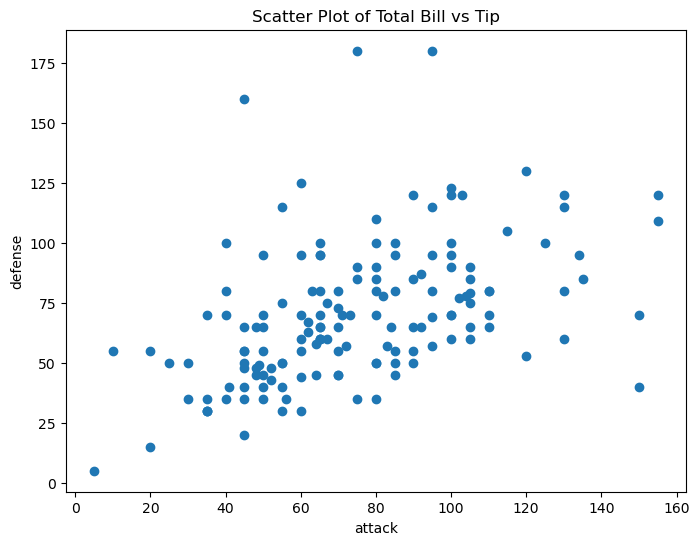

In [76]:
# Plotting the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(pokemon['attack'], pokemon['defense'])
plt.title('Scatter Plot of Total Bill vs Tip')
plt.xlabel('attack')
plt.ylabel('defense')
plt.show()

### Let's interpret the scatter plot of 'attack' versus 'defense' for Pokémon:

- Positive Correlation: The scatter plot reveals a generally positive correlation between 'attack' and 'defense.' As the 'attack' stat increases, there is a tendency for the 'defense' stat to also increase. This suggests that Pokémon with higher attack capabilities often have stronger defenses.

- Cluster Formation: While there is a positive trend, there are distinct clusters of points. These clusters might indicate different classes or types of Pokémon with varying attack and defense characteristics. It's interesting to observe how Pokémon are grouped based on these attributes.

- Outliers: Some points seem to deviate from the general trend. These outliers could represent Pokémon with exceptional attack or defense stats compared to their counterparts. Exploring these outliers might reveal unique and powerful Pokémon with unbalanced stats.

- Scatter Spread: The spread of points across the plot indicates the diversity in Pokémon attributes. Some Pokémon specialize in high attack and low defense, while others balance both attributes. The scatter plot visually captures the variability in the Pokémon world.

- Potential Strategy Insights: Trainers could use this scatter plot to strategize their team compositions. Pokémon with balanced attack and defense might serve as versatile choices, while those with specialized stats could excel in specific battle scenarios.

- Data Exploration: The scatter plot serves as a starting point for further exploration. Additional analysis could involve considering Pokémon types, abilities, or evolutionary stages to uncover more nuanced patterns in the relationships between attack and defense.

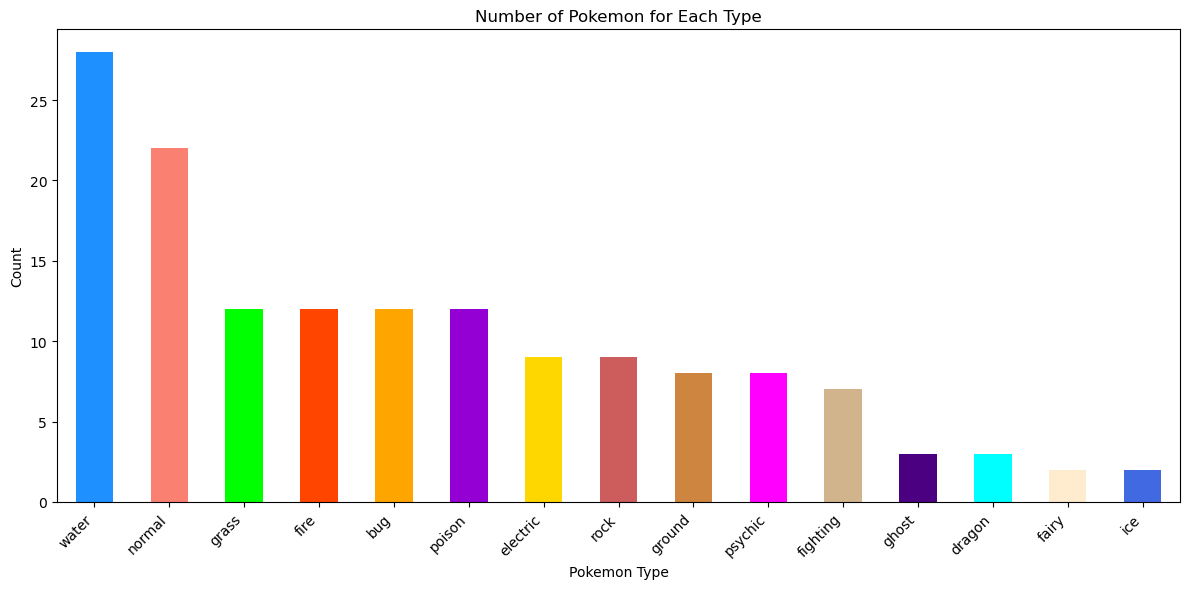

In [77]:

# Count the occurrences of each Pokemon type
type_counts = pokemon['type1'].value_counts()

# Plotting the vertical bar chart
plt.figure(figsize=(12, 6))
type_counts.plot(kind='bar', color=['dodgerblue', 'salmon', 'lime', 'orangered', 'orange', 'darkviolet', 'gold', 'indianred',
                                   'peru', 'fuchsia', 'tan', 'indigo', 'cyan', 'blanchedalmond', 'royalblue'])
plt.xlabel('Pokemon Type')
plt.ylabel('Count')
plt.title('Number of Pokemon for Each Type')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()


### insights:-
- The bar plot you've created shows the distribution of Pokemon across different types. From this plot, you can draw several insights:

- Most Common Types: You can easily identify the most common Pokemon types by looking at the tallest bars in the plot. For example,'Water' and 'Normal' have the highest bars, it suggests that these types are more prevalent in the in Generation 1.

- Rare Types: Conversely, shorter bars indicate less common Pokemon types in the dataset. If certain types have very few representatives, they can be considered rarer.For example, 'fairy', 'Ice' have the shorest bars, it suggests that thes types are less prevalent in the generation1

- Type Diversity: The variety of colors in the plot represents the diversity of Pokemon types in the dataset. 

- Imbalances: If there are significant differences in the heights of bars, it may indicate imbalances in the dataset. For instance, if 'Water' Pokemon dominate the dataset, it could skew any analysis based on type.

- Analysis of Specific Types: You can analyze specific types by looking at their individual bars. For example, if 'Fire' types have a particularly low count, it might be interesting to investigate why

# Univareient Anaylsis With respect to the attack

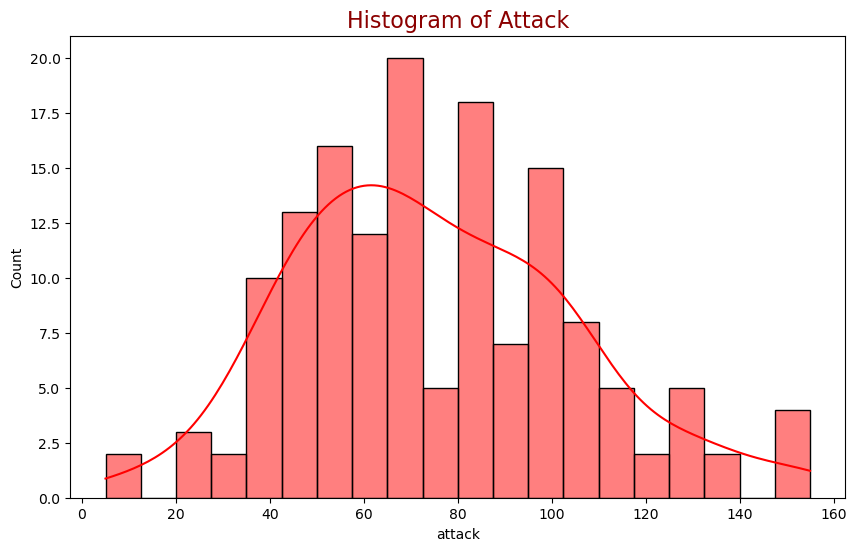

In [78]:

plt.figure(figsize=(10, 6))
sns.histplot(pokemon['attack'], bins=20, kde=True, color='red')
plt.title('Histogram of Attack', fontsize=16, color='darkred')

plt.show()


###  Let's interpret the histogram of the 'attack' stat for Pokémon:

- Distribution Shape: The histogram shows the distribution of Pokémon based on their 'attack' stat. The shape suggests a somewhat right-skewed distribution, indicating that there are more Pokémon with lower attack values, and fewer with exceptionally high attack values.

- Peak Frequency: The histogram peak, also known as the mode, represents the most common 'attack' values among Pokémon. In this case, it appears that a moderate level of attack is more common, with a gradual decrease in frequency as attack values increase.

- Spread and Range: The spread of the histogram illustrates the range of 'attack' values present in the dataset. There's a broad range, encompassing both weak and strong attackers. This variability could contribute to the diversity of battle strategies in the Pokémon world.

- Kernel Density Estimation (KDE): The overlaid KDE curve provides a smooth estimate of the probability density function. It offers additional insights into the underlying distribution, helping to identify potential patterns or trends in the 'attack' stat.

- Bin Width: The histogram is divided into bins, each representing a range of 'attack' values. A bin width of 20 has been chosen, providing a balance between granularity and smoothness in visualizing the distribution.

- Title and Color Scheme: The title "Histogram of Attack" is clear and concise, while the use of a red color scheme complements the theme, emphasizing the intensity of the 'attack' stat.

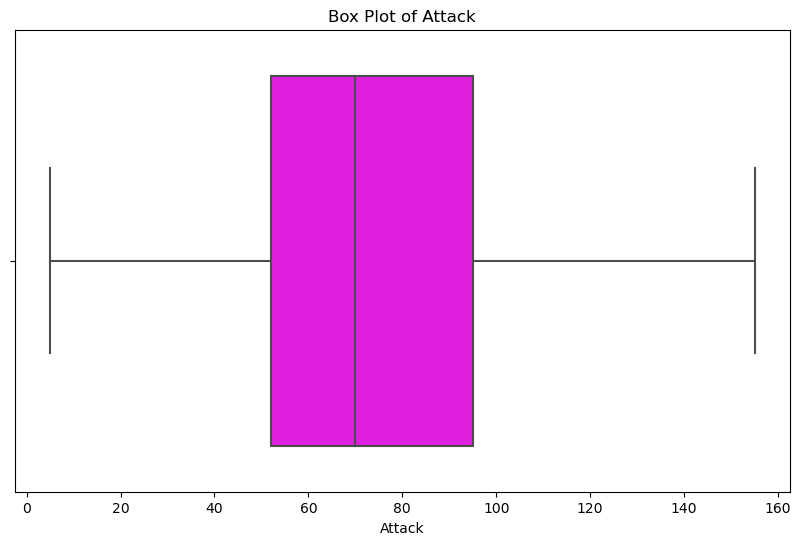

In [79]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=pokemon['attack'], color='fuchsia')
plt.title('Box Plot of Attack')
plt.xlabel('Attack')
plt.show()

### Insights:-! Let's interpret the box plot of the 'attack' stat for Pokémon:

- Median (Q2): The horizontal line inside the box represents the median value of the 'attack' stat. In this case, it indicates the central tendency of the dataset, separating it into two halves.

 - Interquartile Range (IQR): The box's height represents the interquartile range, which spans from the first quartile (Q1) to the third quartile (Q3). It captures the middle 50% of the 'attack' values and provides a measure of statistical dispersion.

- Whiskers: The lines extending from the box, known as whiskers, show the range of 'attack' values within a certain limit. Any data points beyond the whiskers may be considered outliers.

- Outliers: Individual points beyond the whiskers are potential outliers—Pokémon with exceptionally high or low 'attack' stats compared to the majority.

- Box Color: The fuchsia color of the box plot adds a vibrant visual element, making it aesthetically appealing while emphasizing the intensity of the 'attack' stat.

- Title: The title "Box Plot of Attack" succinctly describes the content of the visualization, providing context to the reader.

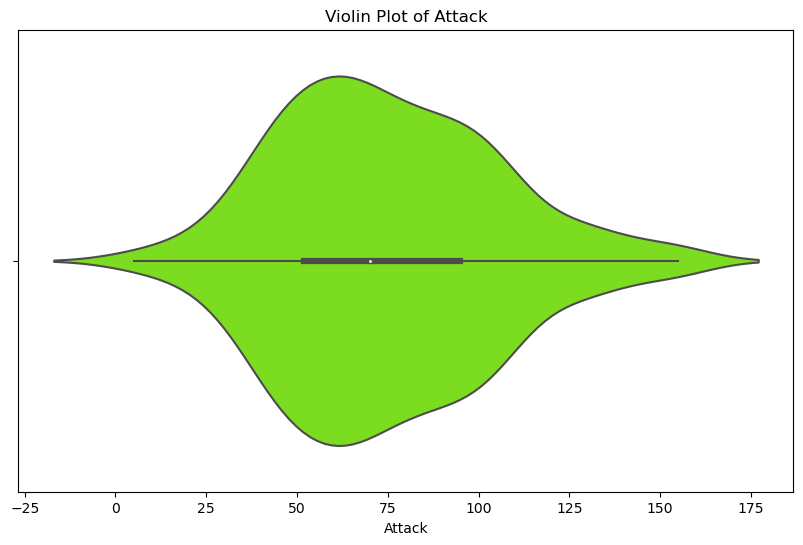

In [80]:
plt.figure(figsize=(10, 6))
sns.violinplot(x=pokemon['attack'], color='lawngreen')
plt.title('Violin Plot of Attack')
plt.xlabel('Attack')
plt.show()

### Insights:-
- Distribution Shape: The violin plot combines aspects of both box plots and kernel density estimation (KDE). It provides a comprehensive view of the distribution of 'attack' values. The wider sections of the plot indicate higher frequency regions, offering insights into the data density at different attack levels.

- Median and Quartiles: Similar to a box plot, the white dot within the violin plot represents the median ('attack' value at the center). The width of the plot at different levels corresponds to the data density, showcasing where Pokémon are more concentrated in terms of attack.

- Spread and Range: The violin plot captures the spread of 'attack' values, and its shape provides information about the skewness or symmetry of the distribution. Wider sections suggest higher density, while narrower sections indicate lower density.

- Outliers: The thin extensions, or "whiskers," of the violin plot can be used to identify potential outliers. Points beyond these extensions represent Pokémon with extreme 'attack' values compared to the majority.

- Violin Color: The lawngreen color enhances the visual appeal of the plot and adds a vibrant touch to the representation of 'attack' stat distributions.

 - Title: The title "Violin Plot of Attack" concisely communicates the focus of the visualization, making it clear that the plot illustrates the distribution of 'attack' values.

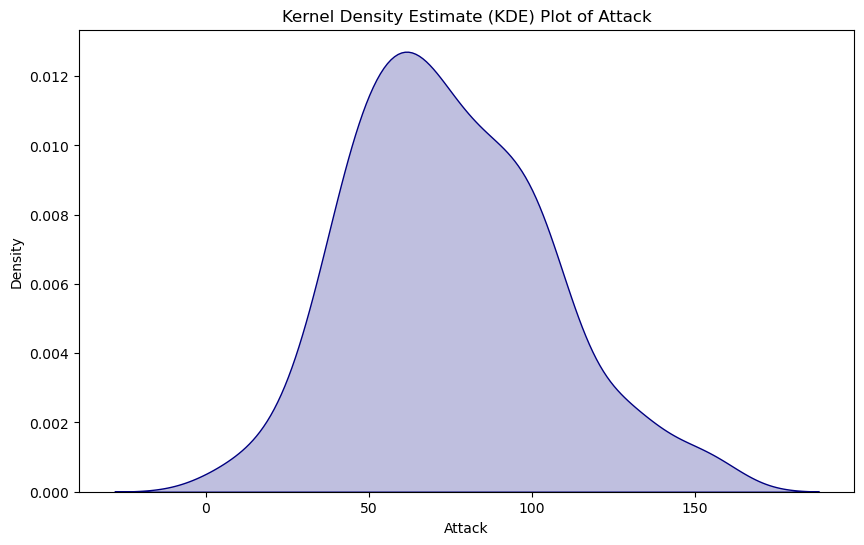

In [81]:
plt.figure(figsize=(10, 6))
sns.kdeplot(pokemon['attack'], fill=True, color='navy')
plt.title('Kernel Density Estimate (KDE) Plot of Attack')
plt.xlabel('Attack')
plt.show()

### Insights:-
- Smooth Density Estimate: The KDE plot provides a smooth estimate of the probability density function for the 'attack' stat. It offers a continuous representation of the distribution, highlighting potential peaks, troughs, and modes in the data.

- Bandwidth and Smoothing: The bandwidth parameter influences the smoothness of the KDE plot. A higher bandwidth results in smoother curves, while a lower bandwidth may capture more intricate details. The navy-colored plot indicates the probability density of 'attack' values, with darker areas representing higher density regions.

- Distribution Shape: Peaks and valleys in the KDE plot correspond to regions of higher and lower probability density, respectively. This allows for a more nuanced exploration of the 'attack' stat distribution compared to traditional histograms.

- Fill Color: The navy fill color enhances the visibility of the area under the KDE curve, making it easier to identify concentration points and patterns in the distribution.

- Title: The title "Kernel Density Estimate (KDE) Plot of Attack" clearly communicates the type of plot and the variable under consideration.

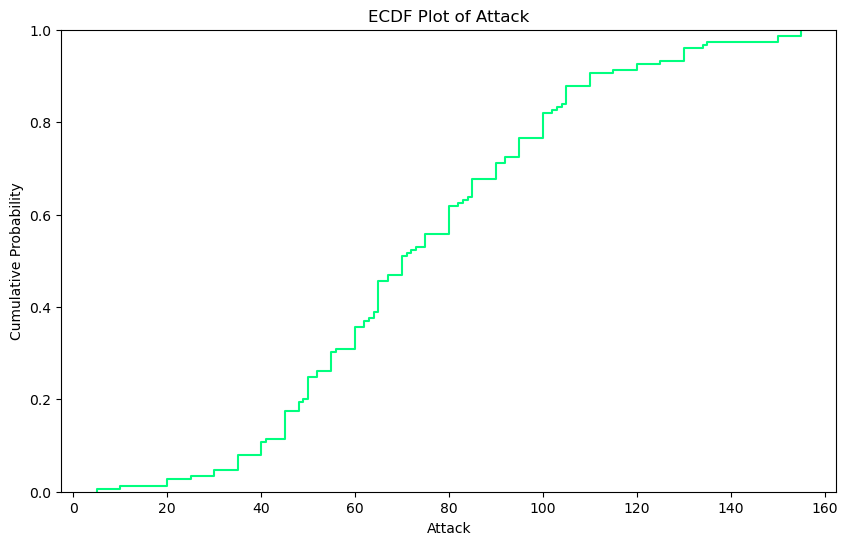

In [82]:
plt.figure(figsize=(10, 6))
sns.ecdfplot(pokemon['attack'], color='springgreen')
plt.title('ECDF Plot of Attack')
plt.xlabel('Attack')
plt.ylabel('Cumulative Probability')
plt.show()

### Insights:-Empirical Cumulative Distribution Function (ECDF) plot of the 'attack' stat for Pokémon:

- Cumulative Probability: The ECDF plot depicts the cumulative probability distribution of 'attack' values. As the x-axis represents different 'attack' values, the y-axis indicates the proportion of Pokémon with an attack stat less than or equal to the corresponding value.

- Stair-Step Pattern: The plot takes on a stair-step pattern, where each step upward corresponds to a Pokémon with a unique 'attack' value. The higher the step, the greater the cumulative proportion of Pokémon with lower or equal 'attack' stats.

- Vertical Jumps: Vertical jumps occur at each distinct 'attack' value, indicating the presence of individual Pokémon with that specific stat. The height of the jump represents the proportion of Pokémon with an 'attack' stat equal to that value.

- Interpretation: For example, if we look at the ECDF plot for 'attack' at a value of 50, the corresponding y-value on the plot represents the proportion of Pokémon with an attack stat less than or equal to 50.

- Color Scheme: The springgreen color adds a visually appealing and nature-inspired touch to the plot, making it easy to distinguish and engaging for the viewer.

- Title and Axes Labels: The title "ECDF Plot of Attack" clearly communicates the type of plot, while the axes labels provide context regarding the variable under consideration and the cumulative probability.

## bie varient

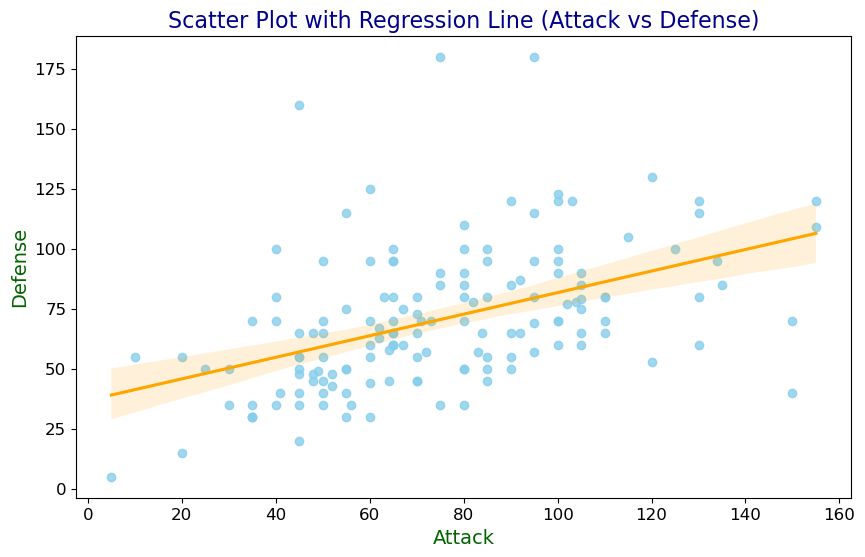

In [83]:

plt.figure(figsize=(10, 6))
sns.regplot(x=pokemon['attack'], y=pokemon['defense'], scatter_kws={'color': 'skyblue'}, line_kws={'color': 'orange'})
plt.title('Scatter Plot with Regression Line (Attack vs Defense)', fontsize=16, color='darkblue')
plt.xlabel('Attack', fontsize=14, color='darkgreen')
plt.ylabel('Defense', fontsize=14, color='darkgreen')
plt.xticks(fontsize=12, color='black')
plt.yticks(fontsize=12, color='black')
plt.show()


### Insights:-
- Overall Trend: The scatter plot reveals the relationship between 'attack' and 'defense' stats for Pokémon. Each point represents a Pokémon, and the scatter of points allows us to observe the general trend between these two variables.

- Regression Line: The orange regression line provides an estimate of the linear relationship between 'attack' and 'defense.' It helps identify the overall direction and strength of the correlation. In this case, the positive slope suggests that, on average, Pokémon with higher attack stats tend to have higher defense stats.

- Scatter Points: Individual data points in skyblue represent specific Pokémon, showcasing their unique combinations of 'attack' and 'defense.' Clusters or patterns within the scatter plot may indicate subgroups with similar characteristics.

- Title: The title "Scatter Plot with Regression Line (Attack vs Defense)" concisely describes the content of the plot, highlighting the variables under consideration.

- Axes Labels: The x-axis labeled 'Attack' and the y-axis labeled 'Defense' provide clarity about the plotted variables. Their font size and color contribute to readability.

- Color Scheme: The combination of skyblue for scatter points and orange for the regression line creates a visually appealing and distinguishable plot.

 - Font Size and Color: The font size and color of the title, axes labels, and tick labels contribute to the overall aesthetics of the plot while ensuring clear communication.

<Figure size 1200x800 with 0 Axes>

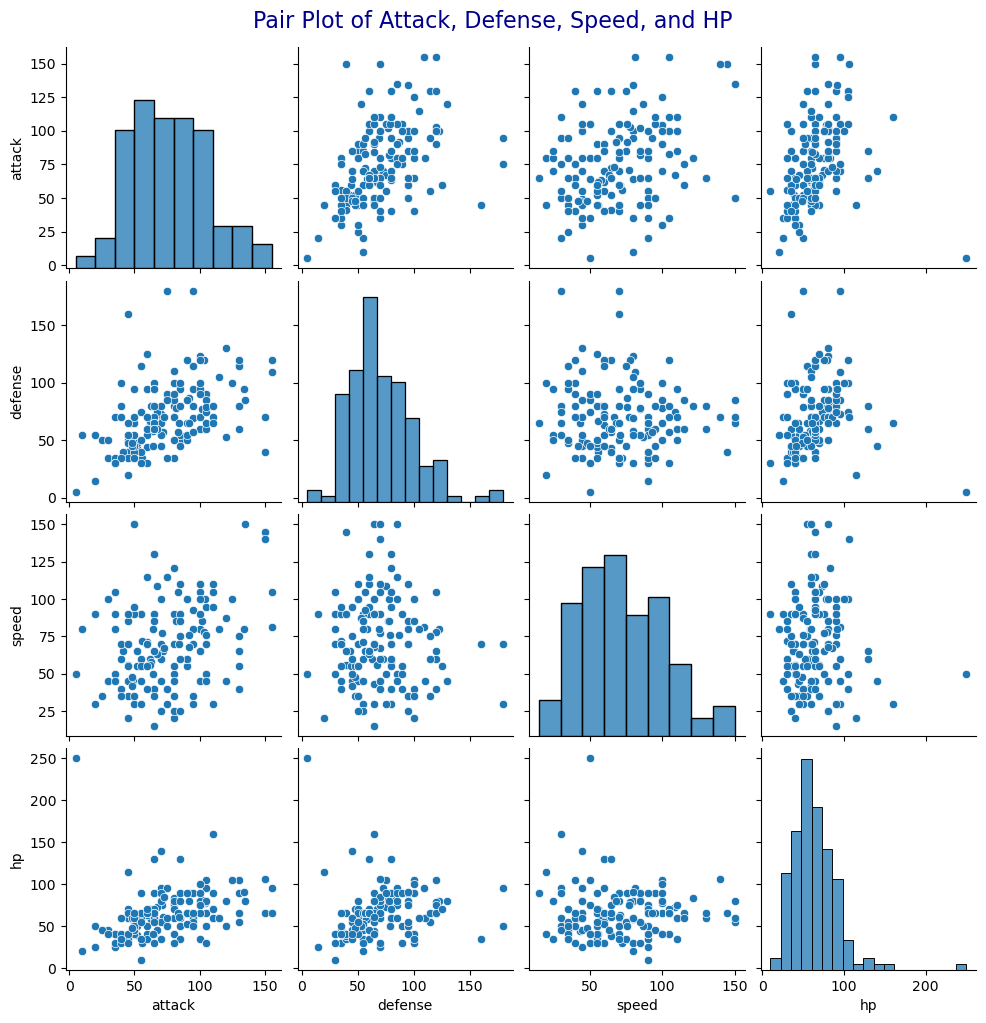

In [84]:
# Pair Plot for Multiple Variables
plt.figure(figsize=(12, 8))
sns.pairplot(pokemon[['attack', 'defense', 'speed', 'hp']], palette='husl')
plt.suptitle('Pair Plot of Attack, Defense, Speed, and HP', y=1.02, fontsize=16, color='darkblue')
plt.show()


### Insights:-
- Diagonal Plots (Histograms):The diagonal plots display histograms for each of the selected variables ('attack,' 'defense,' 'speed,' and 'hp'). Each histogram shows the distribution of values for the corresponding attribute.

- Upper Triangle (Scatter Plots):The scatter plots in the upper triangle represent pairwise comparisons between the variables. For example, the scatter plot of 'attack' versus 'defense' shows how these two attributes relate to each other.

- Lower Triangle (Mirror Images):The lower triangle mirrors the upper triangle, containing the same scatter plots. This redundancy helps visualize relationships from different perspectives.

- Color Palette: The 'husl' color palette adds vibrant and distinguishable colors to the scatter plots, making it easy to identify different variables.

- Pairwise Relationships:Observing the scatter plots allows for an exploration of the relationships between 'attack,' 'defense,' 'speed,' and 'hp.' For instance, one can assess whether Pokémon with higher attack stats also tend to have higher defense stats.

- Correlation Insights:Clusters or patterns in the scatter plots may indicate correlations between pairs of variables. Strong positive or negative correlations can be visually identified.

- Overall Title: The title "Pair Plot of Attack, Defense, Speed, and HP" provides a clear indication of the variables included in the pair plot and sets the context for interpretation.

- Suptitle Positioning: Placing the super title ('suptitle') above the pair plot enhances the overall presentation, and the fontsize and color contribute to its visibility.

<Figure size 1000x600 with 0 Axes>

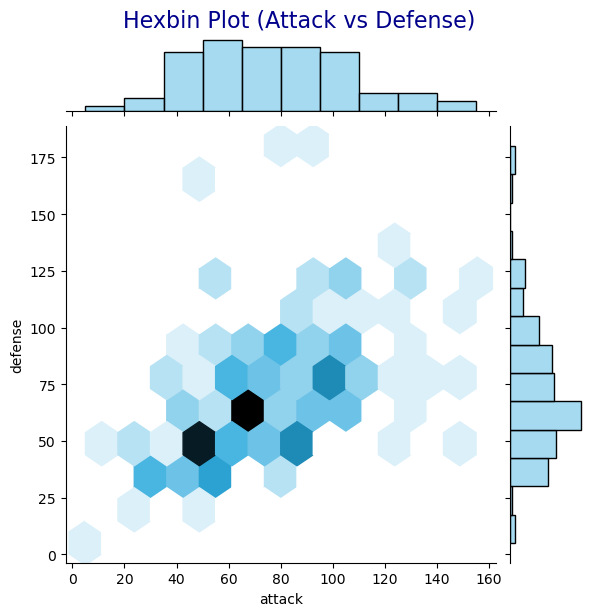

In [85]:
# Hexbin Plot using jointplot
plt.figure(figsize=(10, 6))
sns.jointplot(x=pokemon['attack'], y=pokemon['defense'], kind='hex', color='skyblue')
plt.suptitle('Hexbin Plot (Attack vs Defense)', y=1.02, fontsize=16, color='darkblue')
plt.show()


### Insights:- Hexbin Plot using jointplot for 'attack' versus 'defense' in Pokémon:

- Hexagonal Binning:The plot uses hexagons to bin and visualize the density of points in the scatter plot. Each hexagon represents a region in the plot where Pokémon data points are concentrated.

- Color Gradient:The color of each hexagon indicates the density of points in that region. Darker hexagons represent higher point density, providing a visual representation of the distribution of Pokémon with specific combinations of 'attack' and 'defense' stats.

- Hexbin Plot Type:The 'kind' parameter is set to 'hex,' specifying that a hexbin plot should be used. This is an effective way to handle overlapping points in scatter plots and reveal patterns in dense regions.

- Axes and Marginal Distributions:The plot includes the marginal distributions of 'attack' and 'defense' along the x-axis and y-axis, respectively. These distributions help understand the univariate characteristics of each variable.

- Super Title: The super title ('suptitle') "Hexbin Plot (Attack vs Defense)" provides a clear description of the content, specifying the variables being compared.

- Color Palette: The skyblue color palette adds a visually pleasing and thematic element to the hexbin plot.

- Insight into Density Patterns:By observing the hexagons, one can identify areas with higher concentrations of Pokémon. For example, densely populated hexagons may represent regions where Pokémon have balanced 'attack' and 'defense' stats.

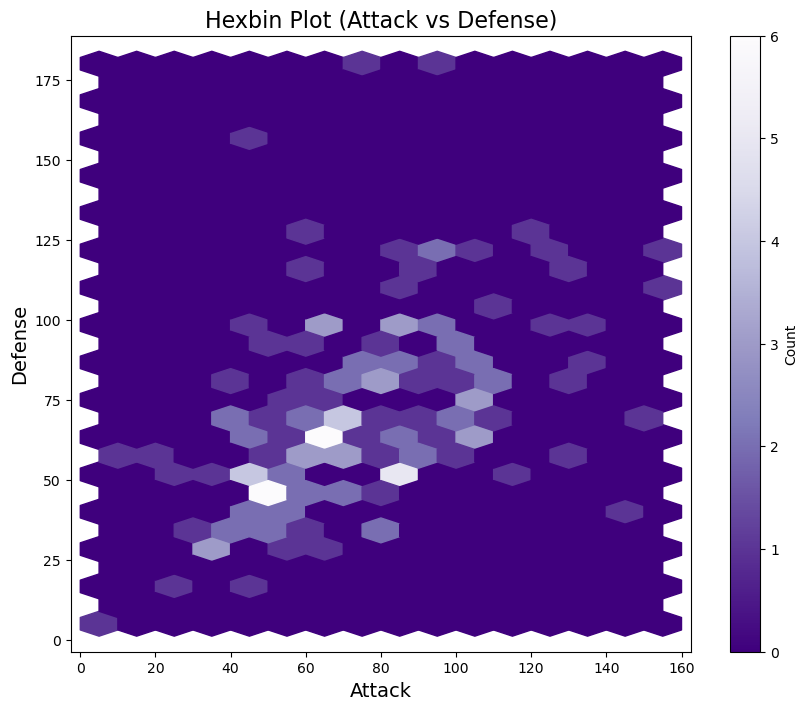

In [86]:

# Create a hexbin plot
plt.figure(figsize=(10, 8))
plt.hexbin(pokemon['attack'], pokemon['defense'], gridsize=(15, 15), cmap=plt.cm.Purples_r)
plt.colorbar(label='Count')

# Set plot title and labels
plt.title('Hexbin Plot (Attack vs Defense)', fontsize=16)
plt.xlabel('Attack', fontsize=14)
plt.ylabel('Defense', fontsize=14)

plt.show()


### Insights:-

- Hexagonal Binning:Similar to the previous hexbin plot, this plot uses hexagons to represent the density of Pokémon data points in the 'attack' versus 'defense' space.

- ridsize Parameter:The 'gridsize' parameter is set to (15, 15), determining the number of hexagons along the x-axis and y-axis. A higher gridsize results in smaller hexagons, providing more granularity in visualizing point density.

- Colormap (Cmap):The Purples colormap (cmap=plt.cm.Purples_r) is used to represent the color gradient in the hexbins. Darker shades of purple indicate higher point density, offering a clear visualization of the distribution.

- Colorbar:The colorbar on the side of the plot provides a reference for the count of data points in each hexagon. The label 'Count' specifies the quantity being measured.

- Title and Axes Labels:The title "Hexbin Plot (Attack vs Defense)" communicates the focus of the plot, and the x-axis and y-axis labels provide clarity about the variables being compared.

- Insights into Density Patterns:By examining the hexagons, one can identify areas with varying densities of Pokémon. Different shades of purple reveal regions with different concentrations of Pokémon based on their 'attack' and 'defense' stats.

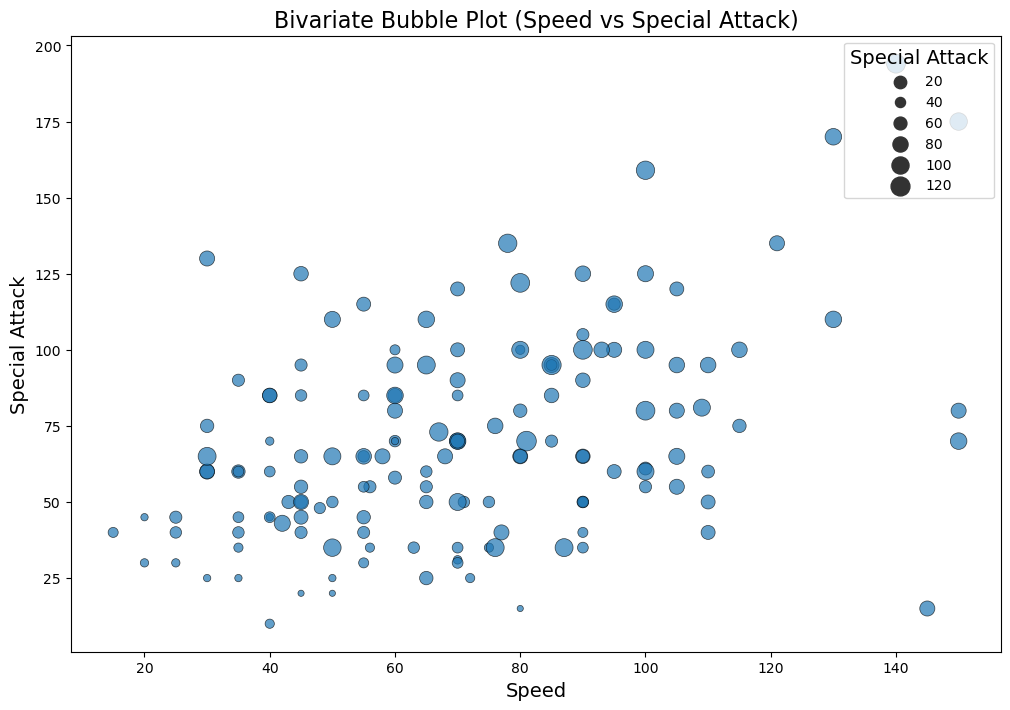

In [87]:

plt.figure(figsize=(12, 8))
sns.scatterplot(x='speed', y='sp_attack', size='sp_defense', data=pokemon, sizes=(20, 200), alpha=0.7, edgecolor='k', linewidth=0.5)

plt.title('Bivariate Bubble Plot (Speed vs Special Attack)', fontsize=16)
plt.xlabel('Speed', fontsize=14)
plt.ylabel('Special Attack', fontsize=14)

legend = plt.legend(title='Special Attack', title_fontsize='14', loc='upper right')
legend.legendHandles[0]._sizes = [80]

plt.show()


### Insights:-

- Scatter Plot:The plot visualizes the relationship between 'speed' and 'sp_attack' for Pokémon using a scatter plot. Each point represents an individual Pokémon.

- Bubble Size:The size of each bubble is determined by the 'sp_defense' stat of the corresponding Pokémon. Larger bubbles represent Pokémon with higher 'sp_defense' stats.

- Alpha (Transparency):The alpha parameter is set to 0.7, introducing transparency to the bubbles. This allows for better visualization of overlapping points, especially in regions with higher point density.

- Edgecolor and Linewidth:The edges of each bubble are outlined in black ('k'), and the linewidth is set to 0.5. This adds a visual distinction between individual bubbles, enhancing their visibility.

- Legend:The legend is placed in the upper right corner of the plot. It indicates the mapping of bubble sizes to the 'sp_defense' values. The legend title, 'Special Attack,' provides context to the legend.

- Bubble Size Legend Adjustment:The size of the legend bubble is adjusted to ensure it is clearly visible. In this case, the size is set to 80.

- Title and Axes Labels:The title "Bivariate Bubble Plot (Speed vs Special Attack)" describes the content of the plot. The x-axis is labeled 'Speed,' and the y-axis is labeled 'Special Attack.'

In [88]:
import plotly.express as px

type1_value_counts = pokemon['type1'].value_counts().reset_index()
type1_value_counts.columns = ['type1', 'count']


fig = px.treemap(
    type1_value_counts,
    path=['type1'],
    values='count',
    title='Pokémon Primary Types Prevalence',
    color='type1',
    color_discrete_map=type_color_map,
    labels={'count': 'Number of Pokémon'},
)

fig.show()


NameError: name 'type_color_map' is not defined

### Insights:-

- Type Distribution:The Treemap visually represents the distribution of Pokémon across different primary types.

- Color Representation:Each Pokémon type is assigned a distinct color for easy identification. For example, Water types are shaded in purple, Grass types in green, and Fire types in red.

- Size of Rectangles:The size of each rectangle corresponds to the number of Pokémon belonging to a specific primary type. Larger rectangles indicate a higher prevalence of that type.


- Common Types:By observing the Treemap, one can quickly identify the most common primary types based on the size of the rectangles. These are the types with a larger number of Pokémon representation.

- Color Legend:The legend on the right provides a key to interpreting the colors associated with each primary Pokémon type. Users can refer to this legend to understand the type-color mapping.

- Interactive Exploration:The Treemap is interactive, allowing users to hover over rectangles to view specific information. This feature enhances the exploratory aspect of the visualization.

- Insights into Pokémon Diversity:The Treemap offers insights into the diversity of Pokémon types in the dataset. Users can quickly identify the range of primary types and their relative prevalence.

- Clear Title and Labels:The title "Pokémon Primary Types Prevalence" and the labels provide clear context, helping users understand the purpose of the visualization and the information it conveys.

In [ ]:

type1_value_counts = pokemon['type1'].value_counts().reset_index()
type1_value_counts.columns = ['type1', 'count']

type_color_map = {
    'Water': '#6D5947',
    'Grass': '#A8AA79',
    'Fire': '#7AC852',
    'Electric': '#A7B822',
    'Normal': '#F85887',
    'Ground': '#EF812E',
    'Rock': '#B99F38',
    'Fighting': '#F6D030',
    'Psychic': '#A0429F',
    'Bug': '#BCA23B',
    'Ghost': '#6991F0',
    'Steel': '#C12F27',
    'Ice': '#70589A',
    'Dark': '#6B3EE3',
    'Fairy': '#B6B8D0',
    'Dragon': '#9AD7D9',
    'Poison': '#FF65D5',
    'Flying': '#A991F0',
}

fig = px.pie(
    type1_value_counts,
    names='type1',
    values='count',
    title='Pokémon Primary Types Distribution',
    color='type1',
    color_discrete_map=type_color_map,
    hole=0.4,  # Set the size of the hole to create a donut chart
)

fig.show()


 ### Insights:-
 
- Type Distribution:The Donut Chart visually represents the distribution of Pokémon across different primary types.

- Color Representation:Each Pokémon type is assigned a distinct color for easy identification. For example, Water types are represented in brown, Grass types in green, Fire types in light green, and so on.

- Slice Size:The size of each slice corresponds to the number of Pokémon belonging to a specific primary type. Larger slices indicate a higher prevalence of that type.

- Common Types:Users can quickly identify the most common primary types by observing the size of the slices. Larger slices represent types with a larger number of Pokémon.

- Color Legend:The legend provides a key to interpreting the colors associated with each primary Pokémon type. Users can refer to this legend to understand the type-color mapping.

- Donut Chart Format:The chart is formatted as a donut chart by setting the hole parameter to 0.4. This creates a central hole in the chart, offering a unique visual style.

- Interactive Exploration:The Pie Chart is interactive, allowing users to hover over slices to view specific information. This interactive feature enhances the exploration of the distribution.

- Clear Title:The title "Pokémon Primary Types Distribution" provides clear context, helping users understand the purpose of the visualization.

In [ ]:

type1_counts = pokemon['type2'].value_counts()

# Create a bar plot
plt.bar(type1_counts.index, type1_counts.values, color='#33FF57')
plt.title('Distribution of Pokémon Types (type1)')
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()


### Insights:-

- Type Distribution:The bar plot visualizes the distribution of Pokémon across different secondary (type2) types.

- Bar Heights:The height of each bar corresponds to the count of Pokémon belonging to a specific secondary type. Taller bars represent types with a higher prevalence.

- Color Representation:All bars are colored in a vibrant green shade (#33FF57), creating a visually appealing chart.

- X-axis Labels:The x-axis labels represent the different secondary types. Each bar is labeled with the corresponding type for easy identification.

- Rotation of Labels:X-axis labels are rotated by 45 degrees and aligned to the right for better readability, especially when dealing with longer type names.

- Title and Axes Labels:The title "Distribution of Pokémon Types (type1)" provides context for the chart. The x-axis is labeled 'Type,' and the y-axis is labeled 'Count.'

- Insights into Secondary Types:By observing the bar plot, one can quickly identify the prevalence of different secondary types among Pokémon. It provides insights into the diversity of secondary types in the dataset.

- Simple and Informative:The bar plot is a straightforward and informative visualization, making it easy for users to grasp the distribution of Pokémon types.

# Conclusion: Pokémon Exploration Extravaganza

Dear Pokémon enthusiasts and Ash Ketchum,

Our journey through the vibrant world of Pokémon has been an exhilarating expedition, filled with fascinating insights and visual wonders. Let's recap the highlights of our exploration:

#### Pokémon Palooza: A Whirlwind of Wackiness in the World of Pocket Monsters

We delved into the heights, weights, attacks, speeds, and defenses of various Pokémon types. The correlation heatmaps unveiled intricate relationships, offering a sneak peek into the dynamics of these marvelous creatures.

#### Battle Insights: Elemental Dynamics Revealed

Elemental battles became a spectacle with our specially crafted heatmaps for each Pokémon type. From Greens to Reds, the colors danced, portraying the strengths and weaknesses in their elemental prowess. Discover the elemental dance that unfolds in every clash!

#### Pokémon Primary Types Prevalence Treemap

A treasure map revealing the prevalence of primary Pokémon types! The Treemap showcased the distribution of Pokémon across different types, each color narrating a unique story. Water, Grass, and Fire stood out as the triumphant champions, dominating the Pokémon landscape.

#### Pokémon Primary Types Distribution Pie Chart

A scrumptious pie of Pokémon types! Slices of adventure represented by colors – Water, Grass, Fire, Electric, and more. This delectable chart provided a visual feast of the diversity of Pokémon types, creating a delightful donut of discovery.

#### Secondary Types Spectacle: Distribution of Pokémon Types (type1) Bar Plot

Secondary types took the stage in a vibrant green display. The bar plot showcased the variety of secondary types, with each bar standing tall, telling tales of Pokémon diversity. Rotated labels ensured an easy read, inviting trainers to decipher the Pokémon code.

#### Overall Reflections:

Through the heights, weights, battles, and types, we've uncovered the rich tapestry of Pokémon attributes. Insights into their strengths, weaknesses, and prevalence have unfolded like pages in a Pokédex.

#### Invitation to Further Exploration:

As we conclude this Pokémon Exploration Extravaganza, the world of Pocket Monsters remains a vast terrain waiting to be explored. Ash Ketchum, are you ready for the next adventure? Trainers, embark on your journey armed with knowledge and curiosity – the Pokémon world is yours to discover!

#### May your Poké Balls stay full, your Pokémon be mighty, and your adventures be legendary!

Happy Pokémon exploring!

Sincerely,
#### Your Pokémon Guide A.Prasanna Kumar

In [89]:
from IPython.display import Image, display
display(Image(url="https://sm.ign.com/ign_ap/screenshot/default/pokemon-ash-feature-image-1_uapv.jpg"))